In [2]:
import sys
# need to modify
sys.path.append('C:/BME/FYP/ppg_device')

%load_ext autoreload
%autoreload 2

In [3]:
sys.path

['c:\\Users\\ASUS\\miniconda3\\python310.zip',
 'c:\\Users\\ASUS\\miniconda3\\DLLs',
 'c:\\Users\\ASUS\\miniconda3\\lib',
 'c:\\Users\\ASUS\\miniconda3',
 '',
 'C:\\Users\\ASUS\\AppData\\Roaming\\Python\\Python310\\site-packages',
 'c:\\Users\\ASUS\\miniconda3\\lib\\site-packages',
 'c:\\Users\\ASUS\\miniconda3\\lib\\site-packages\\win32',
 'c:\\Users\\ASUS\\miniconda3\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\ASUS\\miniconda3\\lib\\site-packages\\Pythonwin',
 'C:/BME/FYP/ppg_device']

In [4]:
import os

import pandas as pd
import matplotlib.pyplot as plt

from utils_ogtt.data_extractor import DataExtractor
from utils_ogtt.visualization import Visualizer
from numpy import absolute
import xgboost
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import pandas as pd

In [256]:
data1=pd.read_csv('C:/BME/FYP/ppg_device/data/ogtt/Participant Cohort 0_1.csv')
data2=pd.read_csv('C:/BME/FYP/ppg_device/data/ogtt/Participant Cohort 0_2.csv')
data3=pd.read_csv('C:/BME/FYP/ppg_device/data/ogtt/Participant Cohort 0_3.csv')
data4=pd.read_csv('C:/BME/FYP/ppg_device/data/ogtt/Participant Cohort 0_4.csv')
data5=pd.read_csv('C:/BME/FYP/ppg_device/data/ogtt/Participant Cohort 0_5.csv')
data6=pd.read_csv('C:/BME/FYP/ppg_device/data/ogtt/Participant Cohort 0_6.csv')
data_frames=[data1, data2, data3, data4, data5, data6]

In [257]:
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Participant ID'],
                                            how='outer'), data_frames)
df_merged.to_csv('C:/BME/FYP/ppg_device/data/ogtt/UKB_cohort_0.csv')
df_merged

,Participant ID,Pulse wave pressure versus time response curve | Instance 0,Diabetes diagnosed by doctor | Instance 0,Glucose | Instance 0,Fasting time | Instance 0,Ethnic background | Instance 0,Genetic sex,Alcohol intake frequency. | Instance 0,Current tobacco smoking | Instance 0,Standing height | Instance 0,Weight | Instance 0,Date of attending assessment centre | Instance 0,Age when attended assessment centre | Instance 0
0,1000063,"100|0,1|1,78|2,235|3,485|4,827|5,1254|6,1763|7...",No,4.900,3,"[""British""]",Female,Daily or almost daily,No,166.0,61.8,2009-07-09,62
1,1000117,"100|0,-3|1,315|2,955|3,1794|4,2693|5,3498|6,41...",No,4.854,3,"[""British""]",Male,Three or four times a week,No,170.0,72.8,2010-03-30,68
2,1000149,"100|0,1|1,52|2,293|3,808|4,1629|5,2717|6,3963|...",No,4.874,10,"[""Prefer not to answer""]",Male,Prefer not to answer,Prefer not to answer,168.0,94.2,2010-04-21,60
3,1000186,"100|0,1|1,47|2,192|3,471|4,951|5,1690|6,2692|7...",No,5.056,3,"[""British""]",Female,Three or four times a week,No,168.0,71.9,2009-10-22,63
4,1000198,"100|0,0|1,70|2,309|3,684|4,1146|5,1692|6,2301|...",No,4.595,3,"[""British""]",Female,Daily or almost daily,No,170.0,78.5,2009-08-21,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2067160,"100|0,0|1,16|2,40|3,76|4,130|5,222|6,410|7,722...",No,5.585,3,"[""British""]",Female,Daily or almost daily,No,166.0,70.5,2009-11-19,68
29996,2067186,"100|0,1|1,117|2,452|3,1053|4,1903|5,2938|6,406...",No,5.577,2,"[""White and Asian""]",Male,One to three times a month,No,181.0,103.4,2009-09-30,49
29997,2067198,"100|0,2|1,85|2,320|3,832|4,1721|5,3022|6,4610|...",No,5.450,4,"[""British""]",Female,Once or twice a week,No,177.0,80.6,2009-10-22,59
29998,2067203,"100|0,0|1,51|2,221|3,538|4,1019|5,1667|6,2481|...",No,9.184,7,"[""British""]",Male,Three or four times a week,No,183.5,112.0,2009-10-29,55


In [258]:
#pipeline to generate similar data
df=pd.read_csv('C:/BME/FYP/ppg_device/data/ogtt/UKB_cohort_0.csv')
df = df.rename(columns={'Participant ID': 'subject_id', 'Genetic sex': 'gender', 'Standing height | Instance 0': 'height','Weight | Instance 0': 'weight', 'Fasting time | Instance 0':'last_meal_time'
                        ,'Ethnic background | Instance 0': 'ethnicity', 'Diabetes diagnosed by doctor | Instance 0': 'diabetes', 'Current tobacco smoking | Instance 0': 'smoking', 'Alcohol intake frequency. | Instance 0': 'alcohol',
                        'Pulse wave pressure versus time response curve | Instance 0': 'ppg', 'Age when attended assessment centre | Instance 0': 'age', 'Glucose | Instance 0': 'glucose_level', 'Date of attending assessment centre | Instance 0': 'record_date'
})
#subject_id,record_date,gender,age,height,weight,last_meal_time,ethnicity,diabetes,smoking,alcohol,heart_rate_before,blood_glucose_before,ppg_file_before,heart_rate_after,blood_glucose_after,ppg_file_after,notes
df = df[['subject_id', 'record_date','gender', 'age','height','weight','last_meal_time', 'ethnicity', 'diabetes', 'glucose_level', 'smoking', 'alcohol','ppg']]
df.to_csv('C:/BME/FYP/ppg_device/data/ogtt/UKB_cohort_0_formatted.csv')
df

,subject_id,record_date,gender,age,height,weight,last_meal_time,ethnicity,diabetes,glucose_level,smoking,alcohol,ppg
0,1000063,2009-07-09,Female,62,166.0,61.8,3,"[""British""]",No,4.900,No,Daily or almost daily,"100|0,1|1,78|2,235|3,485|4,827|5,1254|6,1763|7..."
1,1000117,2010-03-30,Male,68,170.0,72.8,3,"[""British""]",No,4.854,No,Three or four times a week,"100|0,-3|1,315|2,955|3,1794|4,2693|5,3498|6,41..."
2,1000149,2010-04-21,Male,60,168.0,94.2,10,"[""Prefer not to answer""]",No,4.874,Prefer not to answer,Prefer not to answer,"100|0,1|1,52|2,293|3,808|4,1629|5,2717|6,3963|..."
3,1000186,2009-10-22,Female,63,168.0,71.9,3,"[""British""]",No,5.056,No,Three or four times a week,"100|0,1|1,47|2,192|3,471|4,951|5,1690|6,2692|7..."
4,1000198,2009-08-21,Female,64,170.0,78.5,3,"[""British""]",No,4.595,No,Daily or almost daily,"100|0,0|1,70|2,309|3,684|4,1146|5,1692|6,2301|..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2067160,2009-11-19,Female,68,166.0,70.5,3,"[""British""]",No,5.585,No,Daily or almost daily,"100|0,0|1,16|2,40|3,76|4,130|5,222|6,410|7,722..."
29996,2067186,2009-09-30,Male,49,181.0,103.4,2,"[""White and Asian""]",No,5.577,No,One to three times a month,"100|0,1|1,117|2,452|3,1053|4,1903|5,2938|6,406..."
29997,2067198,2009-10-22,Female,59,177.0,80.6,4,"[""British""]",No,5.450,No,Once or twice a week,"100|0,2|1,85|2,320|3,832|4,1721|5,3022|6,4610|..."
29998,2067203,2009-10-29,Male,55,183.5,112.0,7,"[""British""]",No,9.184,No,Three or four times a week,"100|0,0|1,51|2,221|3,538|4,1019|5,1667|6,2481|..."


In [259]:
ppg=df['ppg'].str.split("|", n = 101, expand = True) 
ppg.drop(0, axis=1, inplace=True)
ppg.drop(101, axis=1, inplace=True)

ppg.to_csv('C:/BME/FYP/ppg_device/data/ogtt/ppg_cohort_0.csv', sep=',', encoding='utf-8', index=False, header=False, decimal='.')
ppg

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,"0,1","1,78","2,235","3,485","4,827","5,1254","6,1763","7,2325","8,2921","9,3532",...,"90,812","91,702","92,592","93,480","94,362","95,240","96,128","97,43","98,-2","99,1"
1,"0,-3","1,315","2,955","3,1794","4,2693","5,3498","6,4124","7,4699","8,5401","9,6205",...,"90,973","91,927","92,871","93,816","94,704","95,443","96,174","97,-26","98,-92","99,-3"
2,"0,1","1,52","2,293","3,808","4,1629","5,2717","6,3963","7,5235","8,6411","9,7409",...,"90,1070","91,936","92,802","93,669","94,535","95,400","96,269","97,148","98,51","99,1"
3,"0,1","1,47","2,192","3,471","4,951","5,1690","6,2692","7,3917","8,5279","9,6647",...,"90,447","91,391","92,327","93,279","94,240","95,183","96,111","97,43","98,3","99,1"
4,"0,0","1,70","2,309","3,684","4,1146","5,1692","6,2301","7,2967","8,3673","9,4379",...,"90,507","91,419","92,333","93,259","94,212","95,160","96,84","97,18","98,-17","99,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,"0,0","1,16","2,40","3,76","4,130","5,222","6,410","7,722","8,1170","9,1756",...,"90,254","91,207","92,163","93,123","94,86","95,55","96,29","97,10","98,0","99,0"
29996,"0,1","1,117","2,452","3,1053","4,1903","5,2938","6,4069","7,5204","8,6271","9,7221",...,"90,956","91,849","92,734","93,614","94,487","95,357","96,230","97,114","98,27","99,1"
29997,"0,2","1,85","2,320","3,832","4,1721","5,3022","6,4610","7,6236","8,7632","9,8626",...,"90,809","91,719","92,631","93,519","94,390","95,276","96,185","97,90","98,17","99,2"
29998,"0,0","1,51","2,221","3,538","4,1019","5,1667","6,2481","7,3379","8,4308","9,5230",...,"90,675","91,590","92,505","93,421","94,336","95,250","96,166","97,90","98,30","99,0"


In [260]:
ppg

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,"0,1","1,78","2,235","3,485","4,827","5,1254","6,1763","7,2325","8,2921","9,3532",...,"90,812","91,702","92,592","93,480","94,362","95,240","96,128","97,43","98,-2","99,1"
1,"0,-3","1,315","2,955","3,1794","4,2693","5,3498","6,4124","7,4699","8,5401","9,6205",...,"90,973","91,927","92,871","93,816","94,704","95,443","96,174","97,-26","98,-92","99,-3"
2,"0,1","1,52","2,293","3,808","4,1629","5,2717","6,3963","7,5235","8,6411","9,7409",...,"90,1070","91,936","92,802","93,669","94,535","95,400","96,269","97,148","98,51","99,1"
3,"0,1","1,47","2,192","3,471","4,951","5,1690","6,2692","7,3917","8,5279","9,6647",...,"90,447","91,391","92,327","93,279","94,240","95,183","96,111","97,43","98,3","99,1"
4,"0,0","1,70","2,309","3,684","4,1146","5,1692","6,2301","7,2967","8,3673","9,4379",...,"90,507","91,419","92,333","93,259","94,212","95,160","96,84","97,18","98,-17","99,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,"0,0","1,16","2,40","3,76","4,130","5,222","6,410","7,722","8,1170","9,1756",...,"90,254","91,207","92,163","93,123","94,86","95,55","96,29","97,10","98,0","99,0"
29996,"0,1","1,117","2,452","3,1053","4,1903","5,2938","6,4069","7,5204","8,6271","9,7221",...,"90,956","91,849","92,734","93,614","94,487","95,357","96,230","97,114","98,27","99,1"
29997,"0,2","1,85","2,320","3,832","4,1721","5,3022","6,4610","7,6236","8,7632","9,8626",...,"90,809","91,719","92,631","93,519","94,390","95,276","96,185","97,90","98,17","99,2"
29998,"0,0","1,51","2,221","3,538","4,1019","5,1667","6,2481","7,3379","8,4308","9,5230",...,"90,675","91,590","92,505","93,421","94,336","95,250","96,166","97,90","98,30","99,0"


<AxesSubplot: title={'center': 'Normal Subject Plot'}>

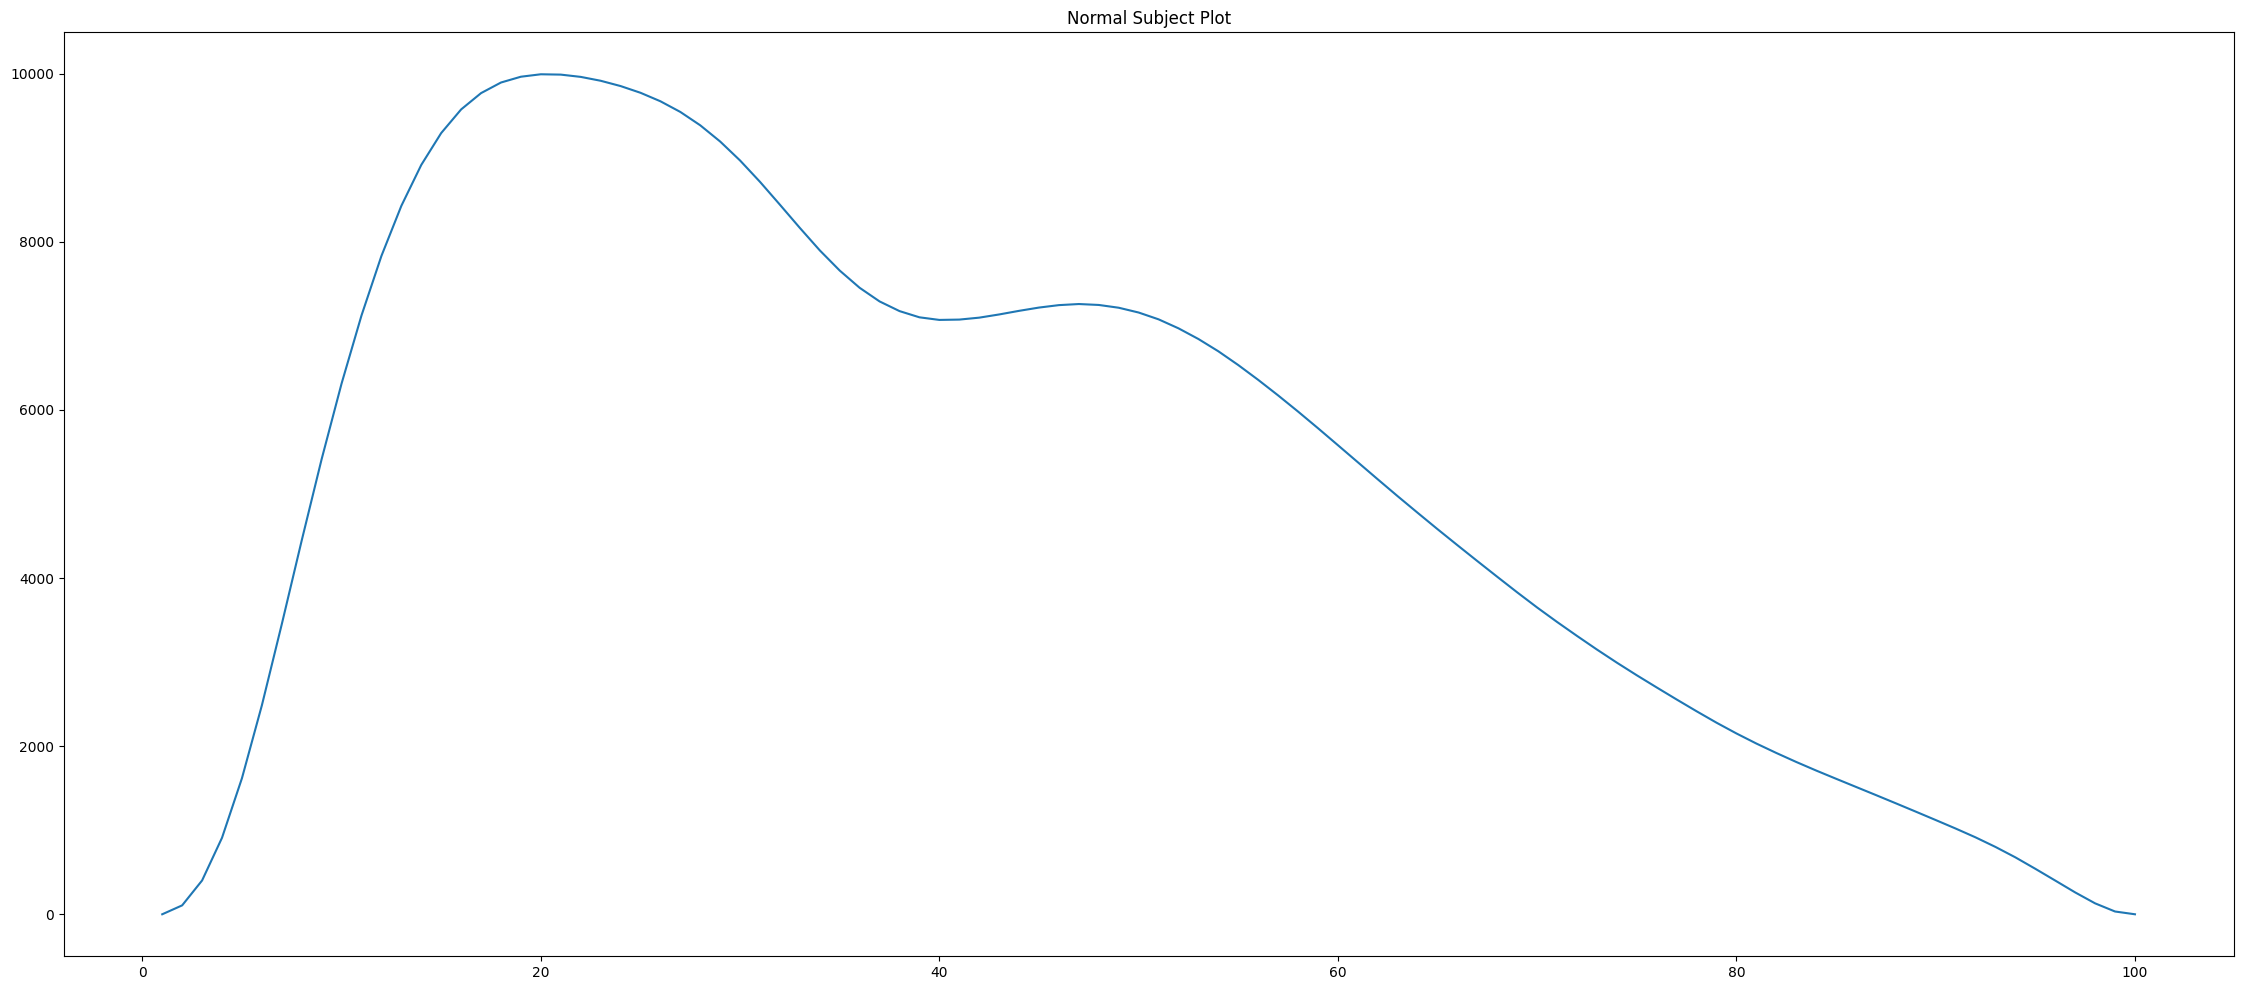

In [261]:
subject= 29999#0-30000
new=ppg.T.iloc[:,subject].str.split(",", n = 100, expand = True) 
a=new.T[1:2]
a=a.astype(int)
a.squeeze(axis=0).plot(title="Normal Subject Plot")

In [ ]:
# Assuming subject is a range of subjects (e.g., subject = 29999#0-29999)
subject_list = range(30000)  # Replace with the correct range
# Create a new DataFrame to store the results
new_df = pd.concat([ppg.T.iloc[:, subject].str.split(",", n=100, expand=True).T[1:2].astype(int) for subject in subject_list])

In [4]:
df=pd.read_csv('C:/BME/FYP/ppg_device/data/ogtt/UKB_cohort_0_data.csv', index_col=0)
df=df.set_index('subject_id')
df=df.drop(columns=['record_date', "Heart_Rate"])
df=df.dropna()
df=df.reset_index()
df

,subject_id,gender,age,height,weight,last_meal_time,ethnicity,diabetes,glucose_level,smoking,alcohol,md_so,md_sd,t_sd,md_do,sd_r,AUC
0,1000117,Male,68,170.0,72.8,3,"[""British""]",No,4.854,No,Three or four times a week,2269.399848,7934.237702,0.496,-5664.837853,3.496183,0.00000
1,1000149,Male,60,168.0,94.2,10,"[""Prefer not to answer""]",No,4.874,Prefer not to answer,Prefer not to answer,5423.760436,4398.493138,0.200,1025.267298,0.810967,89335.22230
2,1000186,Female,63,168.0,71.9,3,"[""British""]",No,5.056,No,Three or four times a week,6551.140251,6771.208491,0.248,-220.068240,1.033592,89335.22230
3,1000198,Female,64,170.0,78.5,3,"[""British""]",No,4.595,No,Daily or almost daily,5428.841070,6296.923297,0.232,-868.082227,1.159902,69006.68128
4,1000203,Female,59,155.0,49.3,4,"[""British""]",No,5.493,No,Three or four times a week,5018.737353,7971.205363,0.392,-2952.468009,1.588289,35480.52958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25327,2067160,Female,68,166.0,70.5,3,"[""British""]",No,5.585,No,Daily or almost daily,6754.470868,8572.427924,0.224,-1817.957056,1.269149,72794.28663
25328,2067186,Male,49,181.0,103.4,2,"[""White and Asian""]",No,5.577,No,One to three times a month,6208.875791,5290.935873,0.208,917.939918,0.852157,113687.98090
25329,2067198,Female,59,177.0,80.6,4,"[""British""]",No,5.450,No,Once or twice a week,5970.864612,6124.779863,0.256,-153.915251,1.025778,94516.20978
25330,2067203,Male,55,183.5,112.0,7,"[""British""]",No,9.184,No,Three or four times a week,5761.001437,6360.699422,0.224,-599.697985,1.104096,74488.70489


In [5]:
cols = [x for x in df.columns if x!='glucose_level']
X = df.loc[:,cols]
y = df['glucose_level']

In [6]:
y

0        4.854
1        4.874
2        5.056
3        4.595
4        5.493
         ...  
25327    5.585
25328    5.577
25329    5.450
25330    9.184
25331    5.307
Name: glucose_level, Length: 25332, dtype: float64

In [7]:
X

,subject_id,gender,age,height,weight,last_meal_time,ethnicity,diabetes,smoking,alcohol,md_so,md_sd,t_sd,md_do,sd_r,AUC
0,1000117,Male,68,170.0,72.8,3,"[""British""]",No,No,Three or four times a week,2269.399848,7934.237702,0.496,-5664.837853,3.496183,0.00000
1,1000149,Male,60,168.0,94.2,10,"[""Prefer not to answer""]",No,Prefer not to answer,Prefer not to answer,5423.760436,4398.493138,0.200,1025.267298,0.810967,89335.22230
2,1000186,Female,63,168.0,71.9,3,"[""British""]",No,No,Three or four times a week,6551.140251,6771.208491,0.248,-220.068240,1.033592,89335.22230
3,1000198,Female,64,170.0,78.5,3,"[""British""]",No,No,Daily or almost daily,5428.841070,6296.923297,0.232,-868.082227,1.159902,69006.68128
4,1000203,Female,59,155.0,49.3,4,"[""British""]",No,No,Three or four times a week,5018.737353,7971.205363,0.392,-2952.468009,1.588289,35480.52958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25327,2067160,Female,68,166.0,70.5,3,"[""British""]",No,No,Daily or almost daily,6754.470868,8572.427924,0.224,-1817.957056,1.269149,72794.28663
25328,2067186,Male,49,181.0,103.4,2,"[""White and Asian""]",No,No,One to three times a month,6208.875791,5290.935873,0.208,917.939918,0.852157,113687.98090
25329,2067198,Female,59,177.0,80.6,4,"[""British""]",No,No,Once or twice a week,5970.864612,6124.779863,0.256,-153.915251,1.025778,94516.20978
25330,2067203,Male,55,183.5,112.0,7,"[""British""]",No,No,Three or four times a week,5761.001437,6360.699422,0.224,-599.697985,1.104096,74488.70489


In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
# 1. One-Hot Encoding for Categorical Variables
# Gender Encoding (Female -> 0, Male -> 1)
X=X.drop(columns='subject_id')
X['gender'] = (X['gender'] == 'Female').astype(int)

# Ethnicity One-Hot Encoding (flattening list first)
X = X.explode('ethnicity')
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
ethnicity_encoded = encoder.fit_transform(X[['ethnicity']])
ethnicity_df = pd.DataFrame(ethnicity_encoded, columns=encoder.get_feature_names_out(['ethnicity']))
X = pd.concat([X.reset_index(drop=True), ethnicity_df.reset_index(drop=True)], axis=1).drop('ethnicity', axis=1)

# Diabetes Encoding (Yes -> 1, No -> 0)
X['diabetes'] = X['diabetes'].map({'Yes': 1, 'No': 0})

# Smoking and Alcohol One-Hot Encoding
X = pd.get_dummies(X, columns=['smoking', 'alcohol'])

# 2. Handling Missing Values with Imputation
# Using mean imputation for the columns with NaN values
imputer = SimpleImputer(strategy='mean')
X[['md_sd', 't_sd', 'md_do', 'sd_r']] = imputer.fit_transform(X[['md_sd', 't_sd', 'md_do', 'sd_r']])

# 3. Normalizing Numerical Columns
scaler = MinMaxScaler()  # You can switch to StandardScaler() for Z-score normalization

# List of columns to normalize
columns_to_normalize = ['age', 'height', 'weight', 'last_meal_time', 'md_so', 'AUC']

# Normalize
X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])
X.columns = X.columns.str.replace(r'ethnicity_\["(.*?)"\]', r'ethnicity_\1', regex=True)
X

,gender,age,height,weight,last_meal_time,diabetes,md_so,md_sd,t_sd,md_do,...,smoking_Only occasionally,smoking_Prefer not to answer,"smoking_Yes, on most or all days",alcohol_Daily or almost daily,alcohol_Never,alcohol_Once or twice a week,alcohol_One to three times a month,alcohol_Prefer not to answer,alcohol_Special occasions only,alcohol_Three or four times a week
0,0,0.935484,0.518248,0.250360,0.083333,0.0,0.257261,7934.237702,0.496,-5664.837853,...,0,0,0,0,0,0,0,0,0,1
1,0,0.677419,0.489051,0.404317,0.277778,0.0,0.654282,4398.493138,0.200,1025.267298,...,0,1,0,0,0,0,0,1,0,0
2,1,0.774194,0.489051,0.243885,0.083333,0.0,0.796179,6771.208491,0.248,-220.068240,...,0,0,0,0,0,0,0,0,0,1
3,1,0.806452,0.518248,0.291367,0.083333,0.0,0.654922,6296.923297,0.232,-868.082227,...,0,0,0,1,0,0,0,0,0,0
4,1,0.645161,0.299270,0.081295,0.111111,0.0,0.603304,7971.205363,0.392,-2952.468009,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25327,1,0.935484,0.459854,0.233813,0.083333,0.0,0.821771,8572.427924,0.224,-1817.957056,...,0,0,0,1,0,0,0,0,0,0
25328,0,0.322581,0.678832,0.470504,0.055556,0.0,0.753100,5290.935873,0.208,917.939918,...,0,0,0,0,0,0,1,0,0,0
25329,1,0.645161,0.620438,0.306475,0.111111,0.0,0.723143,6124.779863,0.256,-153.915251,...,0,0,0,0,0,1,0,0,0,0
25330,0,0.516129,0.715328,0.532374,0.194444,0.0,0.696729,6360.699422,0.224,-599.697985,...,0,0,0,0,0,0,0,0,0,1


In [9]:
X.columns

Index(['gender', 'age', 'height', 'weight', 'last_meal_time', 'diabetes',
       'md_so', 'md_sd', 't_sd', 'md_do', 'sd_r', 'AUC', 'ethnicity_African',
       'ethnicity_Any other Asian background',
       'ethnicity_Any other Black background',
       'ethnicity_Any other mixed background',
       'ethnicity_Any other white background',
       'ethnicity_Asian or Asian British', 'ethnicity_Bangladeshi',
       'ethnicity_British', 'ethnicity_Caribbean', 'ethnicity_Chinese',
       'ethnicity_Do not know', 'ethnicity_Indian', 'ethnicity_Irish',
       'ethnicity_Other ethnic group', 'ethnicity_Pakistani',
       'ethnicity_Prefer not to answer', 'ethnicity_White and Asian',
       'ethnicity_White and Black African',
       'ethnicity_White and Black Caribbean', 'ethnicity_White', 'smoking_No',
       'smoking_Only occasionally', 'smoking_Prefer not to answer',
       'smoking_Yes, on most or all days', 'alcohol_Daily or almost daily',
       'alcohol_Never', 'alcohol_Once or twice a w

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [12]:
X_train

,gender,age,height,weight,last_meal_time,diabetes,md_so,md_sd,t_sd,md_do,...,smoking_Only occasionally,smoking_Prefer not to answer,"smoking_Yes, on most or all days",alcohol_Daily or almost daily,alcohol_Never,alcohol_Once or twice a week,alcohol_One to three times a month,alcohol_Prefer not to answer,alcohol_Special occasions only,alcohol_Three or four times a week
13106,1,0.354839,0.343066,0.121583,0.111111,0.0,0.741875,4339.782334,0.184,1779.906456,...,0,0,0,1,0,0,0,0,0,0
17129,0,0.419355,0.532847,0.303597,0.111111,0.0,0.723201,6162.435193,0.232,-191.105014,...,0,0,0,0,0,1,0,0,0,0
23273,1,0.161290,0.489051,0.192806,0.083333,0.0,0.635568,8102.002500,0.432,-2826.929705,...,0,0,0,0,1,0,0,0,0,0
22955,0,0.161290,0.722628,0.563309,0.083333,0.0,0.649948,5509.196664,0.216,-119.873799,...,0,0,0,0,0,0,1,0,0,0
20208,1,0.129032,0.445255,0.207914,0.083333,0.0,0.700608,8165.229067,0.336,-2373.402033,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1,0.419355,0.313869,0.146763,0.111111,0.0,0.763800,5492.404539,0.200,801.480488,...,0,0,0,0,0,0,0,0,0,1
19648,1,0.193548,0.532847,0.337410,0.083333,0.0,0.635257,5526.188250,0.216,-253.579676,...,0,0,0,0,0,0,0,0,1,0
9845,1,0.032258,0.401460,0.242446,0.111111,0.0,0.558773,5202.162764,0.224,-537.227799,...,0,0,0,0,0,0,1,0,0,0
10799,1,0.870968,0.372263,0.111511,0.138889,0.0,0.697863,6251.338031,0.248,-481.327719,...,0,0,0,0,0,1,0,0,0,0


In [13]:
XGB=XGBRegressor().fit(X_train,y_train)
y_pred=XGB.predict(X_test)

In [14]:
def clarke_error_grid(ref_values, pred_values, title_string):
    # Conversion factor from mg/dL to mmol/L
    conversion_factor = 0.0555

    # Convert reference and prediction values to mmol/L
    ref_values_mmol =ref_values
    pred_values_mmol = pred_values

    # Checking to see if the lengths of the reference and prediction arrays are the same
    assert (len(ref_values_mmol) == len(pred_values_mmol)), "Unequal number of values (reference : {})(prediction : {}).".format(len(ref_values_mmol), len(pred_values_mmol))

    plt.clf()
    # Set up plot
    plt.scatter(ref_values_mmol, pred_values_mmol, marker='o', color='black', s=8)
    plt.title(title_string + " Clarke Error Grid for XGB")
    plt.xlabel("Reference Concentration (mmol/L)")
    plt.ylabel("Prediction Concentration (mmol/L)")
    plt.xticks([0, 50 * conversion_factor, 100 * conversion_factor, 150 * conversion_factor, 200 * conversion_factor, 250 * conversion_factor, 300 * conversion_factor, 350 * conversion_factor, 400 * conversion_factor])
    plt.yticks([0, 50 * conversion_factor, 100 * conversion_factor, 150 * conversion_factor, 200 * conversion_factor, 250 * conversion_factor, 300 * conversion_factor, 350 * conversion_factor, 400 * conversion_factor])
    plt.gca().set_facecolor('white')

    # Set axes lengths
    plt.gca().set_xlim([0, 400 * conversion_factor])
    plt.gca().set_ylim([0, 400 * conversion_factor])
    plt.gca().set_aspect((400 * conversion_factor) / (400 * conversion_factor))

    # Plot zone lines (converting mg/dL values to mmol/L using the conversion factor)
    plt.plot([0, 400 * conversion_factor], [0, 400 * conversion_factor], ':', c='black')  # Theoretical 45 regression line
    plt.plot([0, (175 / 3) * conversion_factor], [70 * conversion_factor, 70 * conversion_factor], '-', c='black')
    plt.plot([(175 / 3) * conversion_factor, (400 / 1.2) * conversion_factor], [70 * conversion_factor, 400 * conversion_factor], '-', c='black')
    plt.plot([70 * conversion_factor, 70 * conversion_factor], [84 * conversion_factor, 400 * conversion_factor], '-', c='black')
    plt.plot([0, 70 * conversion_factor], [180 * conversion_factor, 180 * conversion_factor], '-', c='black')
    plt.plot([70 * conversion_factor, 290 * conversion_factor], [180 * conversion_factor, 400 * conversion_factor], '-', c='black')
    plt.plot([70 * conversion_factor, 70 * conversion_factor], [0, 56 * conversion_factor], '-', c='black')
    plt.plot([70 * conversion_factor, 400 * conversion_factor], [56 * conversion_factor, 320 * conversion_factor], '-', c='black')
    plt.plot([180 * conversion_factor, 180 * conversion_factor], [0, 70 * conversion_factor], '-', c='black')
    plt.plot([180 * conversion_factor, 400 * conversion_factor], [70 * conversion_factor, 70 * conversion_factor], '-', c='black')
    plt.plot([240 * conversion_factor, 240 * conversion_factor], [70 * conversion_factor, 180 * conversion_factor], '-', c='black')
    plt.plot([240 * conversion_factor, 400 * conversion_factor], [180 * conversion_factor, 180 * conversion_factor], '-', c='black')
    plt.plot([130 * conversion_factor, 180 * conversion_factor], [0, 70 * conversion_factor], '-', c='black')

    # Add zone titles
    plt.text(30 * conversion_factor, 15 * conversion_factor, "A", fontsize=15)
    plt.text(370 * conversion_factor, 260 * conversion_factor, "B", fontsize=15)
    plt.text(280 * conversion_factor, 370 * conversion_factor, "B", fontsize=15)
    plt.text(160 * conversion_factor, 370 * conversion_factor, "C", fontsize=15)
    plt.text(160 * conversion_factor, 15 * conversion_factor, "C", fontsize=15)
    plt.text(30 * conversion_factor, 140 * conversion_factor, "D", fontsize=15)
    plt.text(370 * conversion_factor, 120 * conversion_factor, "D", fontsize=15)
    plt.text(30 * conversion_factor, 370 * conversion_factor, "E", fontsize=15)
    plt.text(370 * conversion_factor, 15 * conversion_factor, "E", fontsize=15)

    # Statistics from the data (no change needed here)
    zone = [0] * 5
    for i in range(len(ref_values_mmol)):
        if (ref_values_mmol[i] <= 70 * conversion_factor and pred_values_mmol[i] <= 70 * conversion_factor) or (
                pred_values_mmol[i] <= 1.2 * ref_values_mmol[i] and pred_values_mmol[i] >= 0.8 * ref_values_mmol[i]):
            zone[0] += 1  # Zone A
        elif (ref_values_mmol[i] >= 180 * conversion_factor and pred_values_mmol[i] <= 70 * conversion_factor) or (
                ref_values_mmol[i] <= 70 * conversion_factor and pred_values_mmol[i] >= 180 * conversion_factor):
            zone[4] += 1  # Zone E
        elif ((ref_values_mmol[i] >= 70 * conversion_factor and ref_values_mmol[i] <= 290 * conversion_factor) and
              pred_values_mmol[i] >= ref_values_mmol[i] + 110 * conversion_factor) or (
                (ref_values_mmol[i] >= 130 * conversion_factor and ref_values_mmol[i] <= 180 * conversion_factor) and
                (pred_values_mmol[i] <= (7 / 5) * ref_values_mmol[i] - 182 * conversion_factor)):
            zone[2] += 1  # Zone C
        elif (ref_values_mmol[i] >= 240 * conversion_factor and (
                pred_values_mmol[i] >= 70 * conversion_factor and pred_values_mmol[i] <= 180 * conversion_factor)) or (
                ref_values_mmol[i] <= (175 / 3) * conversion_factor and pred_values_mmol[i] <= 180 * conversion_factor and
                pred_values_mmol[i] >= 70 * conversion_factor) or (
                (ref_values_mmol[i] >= (175 / 3) * conversion_factor and ref_values_mmol[i] <= 70 * conversion_factor) and
                pred_values_mmol[i] >= (6 / 5) * ref_values_mmol[i]):
            zone[3] += 1  # Zone D
        else:
            zone[1] += 1  # Zone B

    return plt, zone


KeyError: 0

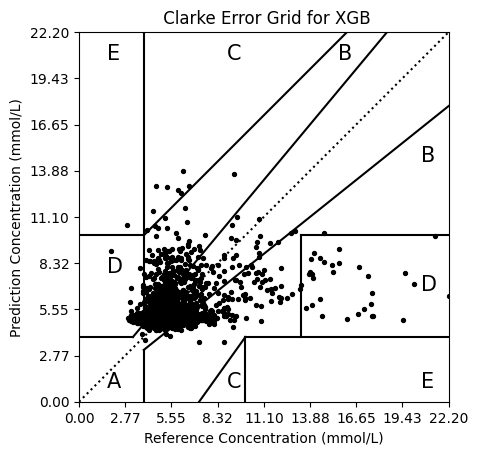

In [15]:
clarke_error_grid(y_test, y_pred, "")
# plt.savefig("rf_features.png")

In [22]:
def parkes_error_zone_detailed(act, pred, diabetes_type):
  def above_line(x_1, y_1, x_2, y_2, strict=False):
    if x_1 == x_2:
      return False
    y_line = ((y_1 - y_2) * act + y_2 * x_1 - y_1 * x_2) / (x_1 - x_2)
    return pred > y_line if strict else pred >= y_line
  def below_line(x_1, y_1, x_2, y_2, strict=False):
    return not above_line(x_1, y_1, x_2, y_2, not strict)
  
  def parkes_type_1(act, pred):
    # Zone E
    if above_line(0, 150 * 0.0555, 35, 155 * 0.0555) and above_line(35, 155 * 0.0555, 50, 550 * 0.0555):
      return 7
    # Zone D - left upper
    if (pred > 100 * 0.0555 and above_line(25, 100 * 0.0555, 50, 125 * 0.0555) and above_line(50, 125 * 0.0555, 80, 215 * 0.0555) and above_line(80, 215 * 0.0555, 125, 550 * 0.0555)):
      return 6
    # Zone D - right lower
    if (act > 250 * 0.0555 and below_line(250 * 0.0555, 40 * 0.0555, 550 * 0.0555, 150 * 0.0555)):
      return 5
    # Zone C - left upper
    if (pred > 60 * 0.0555 and above_line(30, 60 * 0.0555, 50, 80 * 0.0555) and above_line(50, 80 * 0.0555, 70, 110 * 0.0555) and above_line(70, 110 * 0.0555, 260, 550 * 0.0555)):
      return 4
    # Zone C - right lower
    if (act > 120 * 0.0555 and below_line(120 * 0.0555, 30 * 0.0555, 260 * 0.0555, 130 * 0.0555) and below_line(260 * 0.0555, 130 * 0.0555, 550 * 0.0555, 250 * 0.0555)):
      return 3
    # Zone B - left upper
    if (pred > 50 * 0.0555 and above_line(30, 50 * 0.0555, 140, 170 * 0.0555) and above_line(140, 170 * 0.0555, 280, 380 * 0.0555) and (act < 280 * 0.0555 or above_line(280 * 0.0555, 380 * 0.0555, 430, 550 * 0.0555))):
      return 2
    # Zone B - right lower
    if (act > 50 * 0.0555 and below_line(50 * 0.0555, 30 * 0.0555, 170, 145 * 0.0555) and below_line(170, 145 * 0.0555, 385, 300 * 0.0555) and (act < 385 * 0.0555 or below_line(385 * 0.0555, 300 * 0.0555, 550 * 0.0555, 450 * 0.0555))):
      return 1
    # Zone A
    return 0
  
  def parkes_type_2(act, pred):
    # Zone E
    if (pred > 200 * 0.0555 and above_line(35, 200 * 0.0555, 50, 550 * 0.0555)):
      return 7
    # Zone D - left upper
    if (pred > 80 * 0.0555 and above_line(25, 80 * 0.0555, 35, 90 * 0.0555) and above_line(35, 90 * 0.0555, 125, 550 * 0.0555)):
      return 6
    # Zone D - right lower
    if (act > 250 * 0.0555 and below_line(250 * 0.0555, 40 * 0.0555, 410 * 0.0555, 110 * 0.0555) and below_line(410 * 0.0555, 110 * 0.0555, 550 * 0.0555, 160 * 0.0555)):
      return 5
    # Zone C - left upper
    if (pred > 60 * 0.0555 and above_line(30, 60 * 0.0555, 280, 550 * 0.0555)):
      return 4
    # Zone C - right lower
    if (below_line(90 * 0.0555, 0, 260, 130 * 0.0555) and below_line(260, 130 * 0.0555, 550, 250 * 0.0555)):
      return 3
    # Zone B - left upper
    if (pred > 50 * 0.0555 and above_line(30, 50 * 0.0555, 230, 330 * 0.0555) and (act < 230 * 0.0555 or above_line(230 * 0.0555, 330 * 0.0555, 440, 550 * 0.0555))):
      return 2
    # Zone B - right lower
    if (act > 50 * 0.0555 and below_line(50 * 0.0555, 30 * 0.0555, 90 * 0.0555, 80 * 0.0555) and below_line(90 * 0.0555, 80 * 0.0555, 330, 230 * 0.0555) and (act < 330 * 0.0555 or below_line(330, 230 * 0.0555, 550, 450 * 0.0555))):
      return 1
    # Zone A
    return 0

  if diabetes_type == 1:
    return parkes_type_1(act, pred)
  if diabetes_type == 2:
    return parkes_type_2(act, pred)
  raise Exception('Unsupported diabetes type')

# Clarke Error Grid
def clarke_error_zone_detailed(act, pred):
  # Zone A
  if (act < 70 * 0.0555 and pred < 70 * 0.0555) or abs(act - pred) < 0.2 * act:
    return 0
  # Zone E - left upper
  if act <= 70 * 0.0555 and pred >= 180 * 0.0555:
    return 8
  # Zone E - right lower
  if act >= 180 * 0.0555 and pred <= 70 * 0.0555:
    return 7
  # Zone D - right
  if act >= 240 * 0.0555 and 70 * 0.0555 <= pred <= 180 * 0.0555:
    return 6
  # Zone D - left
  if act <= 70 * 0.0555 <= pred <= 180 * 0.0555:
    return 5
  # Zone C - upper
  if 70 * 0.0555 <= act <= 290 * 0.0555 and pred >= act + 110 * 0.0555:
    return 4
  # Zone C - lower
  if 130 * 0.0555 <= act <= 180 * 0.0555 and pred <= (7/5) * act - 182 * 0.0555:
    return 3
  # Zone B - upper
  if act < pred:
    return 2
  # Zone B - lower
  return 1


In [23]:
import numpy as np
clarke_error_zone_detailed = np.vectorize(clarke_error_zone_detailed)
parkes_error_zone_detailed = np.vectorize(parkes_error_zone_detailed)
types = clarke_error_zone_detailed(y_test, y_pred)

In [24]:
from collections import Counter
val_counts = Counter(types)
val_counts

Counter({0: 6674, 2: 474, 1: 313, 5: 99, 6: 31, 4: 8, 8: 1})

In [26]:
dummy = []
for i in range(7):
  dummy.append((val_counts[i]/len(y_test))*100)
print("Zone A: ", dummy[0])
print("Zone B: ", dummy[1]+dummy[2])
print("Zone C: ", dummy[3]+dummy[4])
print("Zone D: ", dummy[5]+dummy[6])
print("accuracy: ", dummy[0]+dummy[1]+dummy[2])

Zone A:  87.81578947368422
Zone B:  10.355263157894736
Zone C:  0.10526315789473684
Zone D:  1.7105263157894737
accuracy:  98.17105263157896


In [387]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
def regression_evaluation(y_true, y_pred, n_features):
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    
    # R-squared (R²)
    r2 = r2_score(y_true, y_pred)
    
    # Adjusted R-squared
    n = len(y_true)  # number of observations
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - n_features - 1))
    
    # Display the results
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")
    print(f"Adjusted R-squared: {adjusted_r2}")

    return mae, mse, rmse, r2, adjusted_r2


Mean Absolute Error (MAE): 0.5674103864860536
Mean Squared Error (MSE): 1.121328396434565
Root Mean Squared Error (RMSE): 1.0589279467624626
R-squared (R²): 0.09817778337385963
Adjusted R-squared: 0.09304565588379554


(0.5674103864860536,
 1.121328396434565,
 1.0589279467624626,
 0.09817778337385963,
 0.09304565588379554)

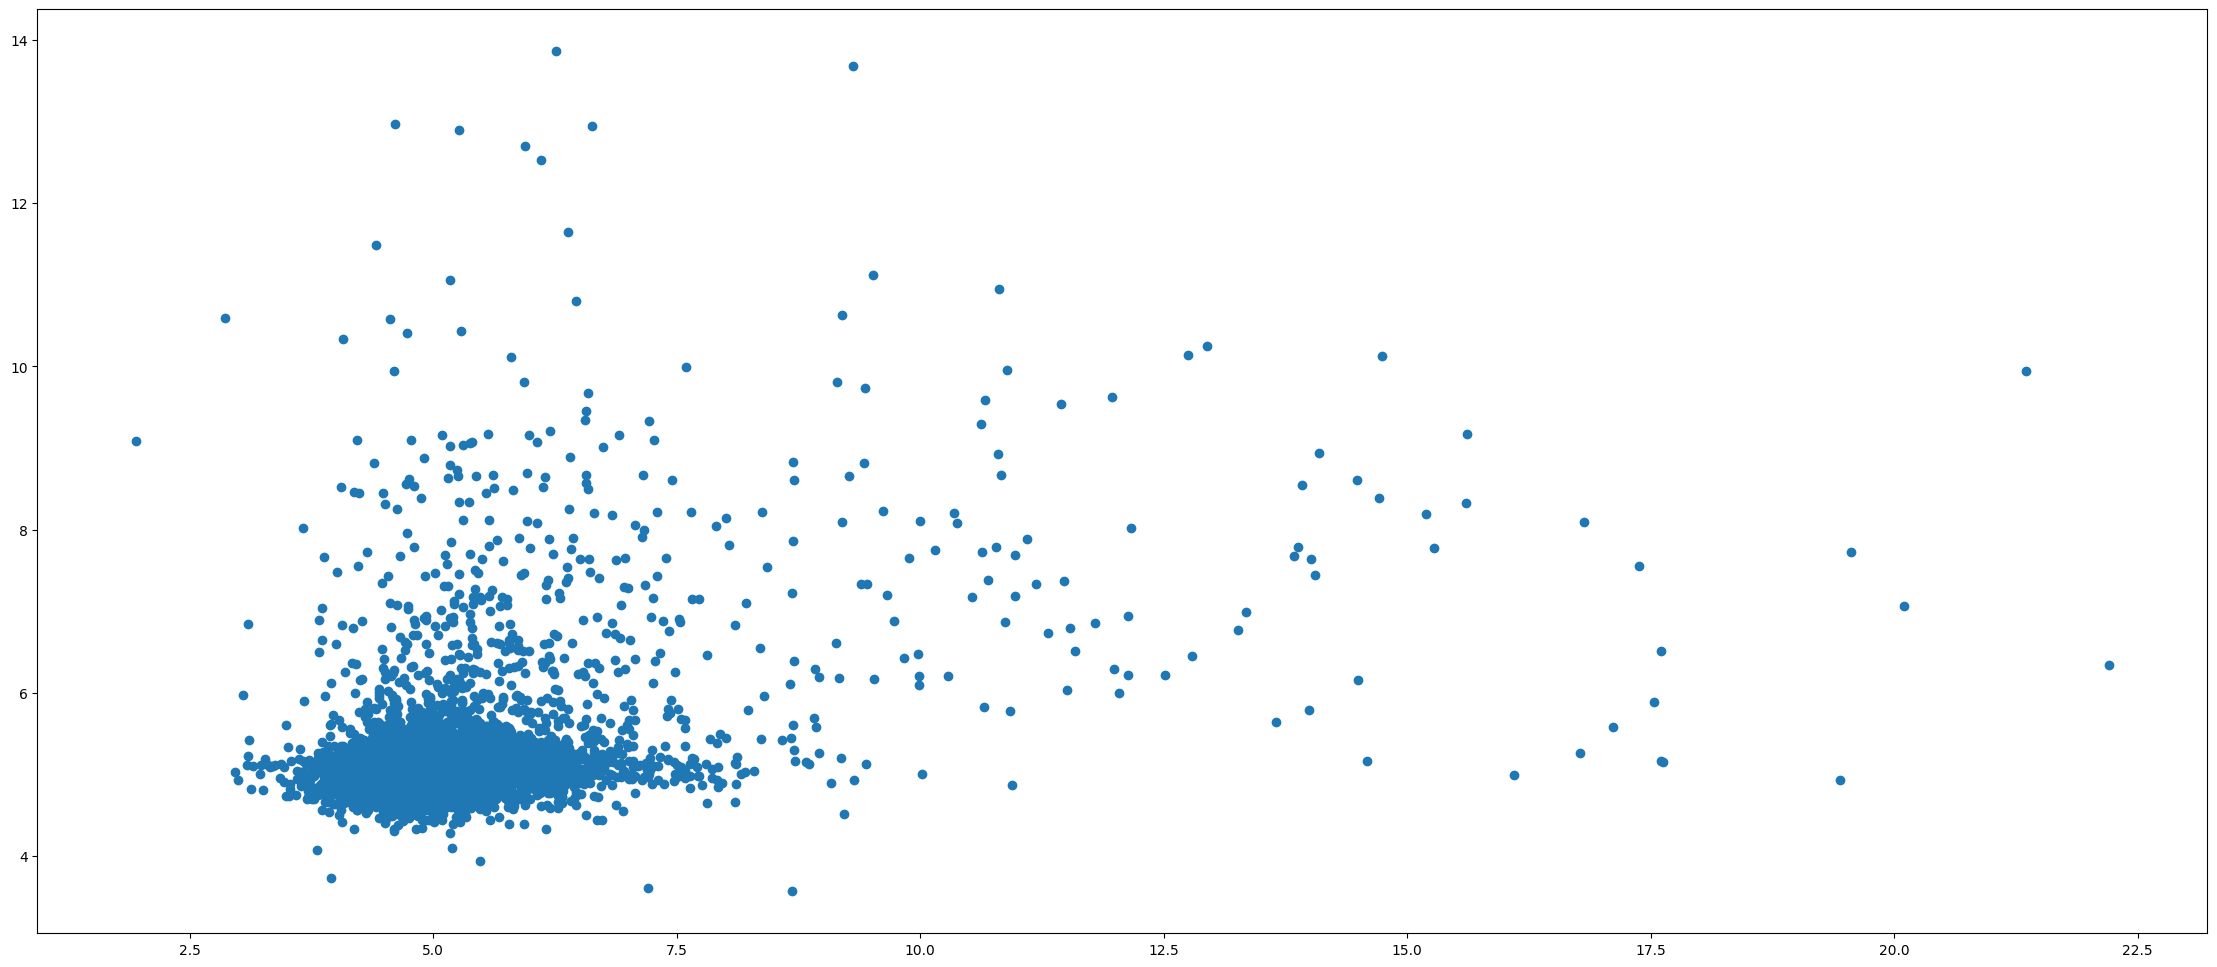

In [388]:
plt.scatter(y_test,y_pred)
n_features=43
regression_evaluation(y_test, y_pred, n_features)

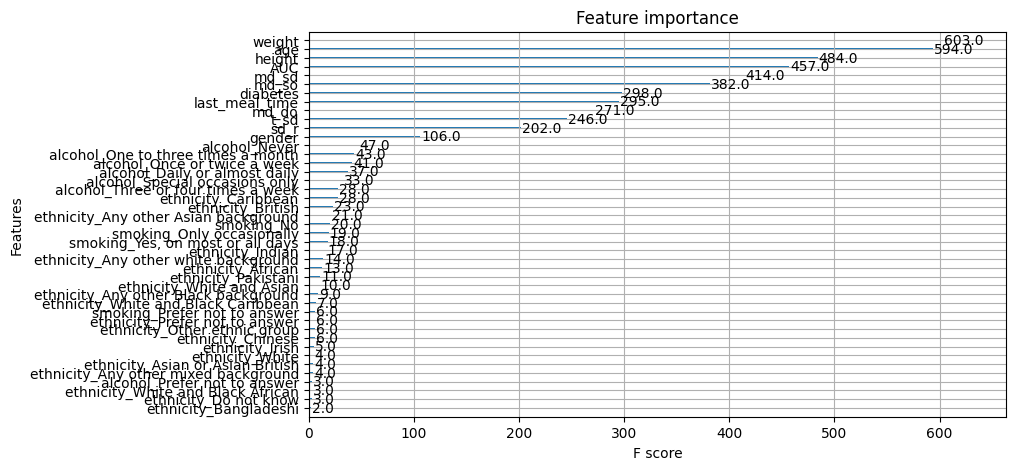

In [389]:
#Features Importance
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,5))
plot_importance(XGB, ax=ax)
plt.show()

In [121]:
df=pd.read_csv('C:/BME/FYP/ppg_device/data/ogtt/UKB_cohort_0_data.csv', index_col=0)
df=df.set_index('subject_id')
df=df.drop(columns=['record_date', "Heart_Rate"])
df=df.dropna()
df = df[df['AUC'] > 0]  # Drop rows where AUC is 0 or less
df=df.reset_index(drop=True)
df

,gender,age,height,weight,last_meal_time,ethnicity,diabetes,glucose_level,smoking,alcohol,md_so,md_sd,t_sd,md_do,sd_r,AUC
0,Male,60,168.0,94.2,10,"[""Prefer not to answer""]",No,4.874,Prefer not to answer,Prefer not to answer,5423.760436,4398.493138,0.200,1025.267298,0.810967,89335.22230
1,Female,63,168.0,71.9,3,"[""British""]",No,5.056,No,Three or four times a week,6551.140251,6771.208491,0.248,-220.068240,1.033592,89335.22230
2,Female,64,170.0,78.5,3,"[""British""]",No,4.595,No,Daily or almost daily,5428.841070,6296.923297,0.232,-868.082227,1.159902,69006.68128
3,Female,59,155.0,49.3,4,"[""British""]",No,5.493,No,Three or four times a week,5018.737353,7971.205363,0.392,-2952.468009,1.588289,35480.52958
4,Female,67,165.0,62.1,5,"[""British""]",No,4.503,No,Once or twice a week,5536.006182,5697.493691,0.232,-161.487508,1.029170,95213.42359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25096,Female,68,166.0,70.5,3,"[""British""]",No,5.585,No,Daily or almost daily,6754.470868,8572.427924,0.224,-1817.957056,1.269149,72794.28663
25097,Male,49,181.0,103.4,2,"[""White and Asian""]",No,5.577,No,One to three times a month,6208.875791,5290.935873,0.208,917.939918,0.852157,113687.98090
25098,Female,59,177.0,80.6,4,"[""British""]",No,5.450,No,Once or twice a week,5970.864612,6124.779863,0.256,-153.915251,1.025778,94516.20978
25099,Male,55,183.5,112.0,7,"[""British""]",No,9.184,No,Three or four times a week,5761.001437,6360.699422,0.224,-599.697985,1.104096,74488.70489


In [122]:
cols = [x for x in df.columns if x!='diabetes']
X = df.loc[:,cols]
# X=X.drop(columns='glucose_level')
y = df['diabetes']
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
# 1. One-Hot Encoding for Categorical Variables
# Gender Encoding (Female -> 0, Male -> 1)
X['gender'] = (X['gender'] == 'Female').astype(int)

# Ethnicity One-Hot Encoding (flattening list first)
X = X.explode('ethnicity')
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
ethnicity_encoded = encoder.fit_transform(X[['ethnicity']])
ethnicity_df = pd.DataFrame(ethnicity_encoded, columns=encoder.get_feature_names_out(['ethnicity']))
X = pd.concat([X.reset_index(drop=True), ethnicity_df.reset_index(drop=True)], axis=1).drop('ethnicity', axis=1)

# # Diabetes Encoding (Yes -> 1, No -> 0)
# X['diabetes'] = X['diabetes'].map({'Yes': 1, 'No': 0})

# Smoking and Alcohol One-Hot Encoding
X = pd.get_dummies(X, columns=['smoking', 'alcohol'])

# 2. Handling Missing Values with Imputation
# Using mean imputation for the columns with NaN values
imputer = SimpleImputer(strategy='mean')
X[['md_sd', 't_sd', 'md_do', 'sd_r']] = imputer.fit_transform(X[['md_sd', 't_sd', 'md_do', 'sd_r']])

# 3. Normalizing Numerical Columns
scaler = MinMaxScaler()  # You can switch to StandardScaler() for Z-score normalization

# List of columns to normalize
columns_to_normalize = ['age', 'height', 'weight', 'last_meal_time', 'md_so', 'AUC']

# Normalize
X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])
X.columns = X.columns.str.replace(r'ethnicity_\["(.*?)"\]', r'ethnicity_\1', regex=True)
y = y.map({'Yes': 1, 'No': 0})
nan_indices = y[y.isna()].index.tolist()
X = X.drop(index=nan_indices)
y = y.dropna()
X

,gender,age,height,weight,last_meal_time,glucose_level,md_so,md_sd,t_sd,md_do,...,smoking_Only occasionally,smoking_Prefer not to answer,"smoking_Yes, on most or all days",alcohol_Daily or almost daily,alcohol_Never,alcohol_Once or twice a week,alcohol_One to three times a month,alcohol_Prefer not to answer,alcohol_Special occasions only,alcohol_Three or four times a week
0,0,0.677419,0.489051,0.404317,0.277778,4.874,0.654282,4398.493138,0.200,1025.267298,...,0,1,0,0,0,0,0,1,0,0
1,1,0.774194,0.489051,0.243885,0.083333,5.056,0.796179,6771.208491,0.248,-220.068240,...,0,0,0,0,0,0,0,0,0,1
2,1,0.806452,0.518248,0.291367,0.083333,4.595,0.654922,6296.923297,0.232,-868.082227,...,0,0,0,1,0,0,0,0,0,0
3,1,0.645161,0.299270,0.081295,0.111111,5.493,0.603304,7971.205363,0.392,-2952.468009,...,0,0,0,0,0,0,0,0,0,1
4,1,0.903226,0.445255,0.173381,0.138889,4.503,0.668410,5697.493691,0.232,-161.487508,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25096,1,0.935484,0.459854,0.233813,0.083333,5.585,0.821771,8572.427924,0.224,-1817.957056,...,0,0,0,1,0,0,0,0,0,0
25097,0,0.322581,0.678832,0.470504,0.055556,5.577,0.753100,5290.935873,0.208,917.939918,...,0,0,0,0,0,0,1,0,0,0
25098,1,0.645161,0.620438,0.306475,0.111111,5.450,0.723143,6124.779863,0.256,-153.915251,...,0,0,0,0,0,1,0,0,0,0
25099,0,0.516129,0.715328,0.532374,0.194444,9.184,0.696729,6360.699422,0.224,-599.697985,...,0,0,0,0,0,0,0,0,0,1


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [124]:
from xgboost import XGBClassifier
clf=XGBClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('precision:', metrics.precision_score(y_test,y_pred))
print('recall:', metrics.recall_score(y_test,y_pred))
print('roc auc:', metrics.roc_auc_score(y_test,y_pred))

Accuracy: 0.9581165799653195
precision: 0.7405660377358491
recall: 0.37740384615384615
roc auc: 0.684818290821592


In [125]:
print('number of diabetes in y_train:', np.count_nonzero(y_train), 'out of', len(y_train))
print('number of diabetes in y_test:', np.count_nonzero(y_test), 'out of', len(y_test))
print('number of diabetes in y_pred:', np.count_nonzero(y_pred), 'out of', len(y_pred))

number of diabetes in y_train: 983 out of 17490
number of diabetes in y_test: 416 out of 7497
number of diabetes in y_pred: 212 out of 7497


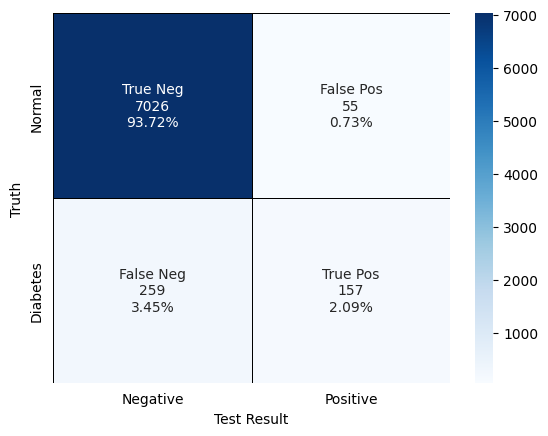

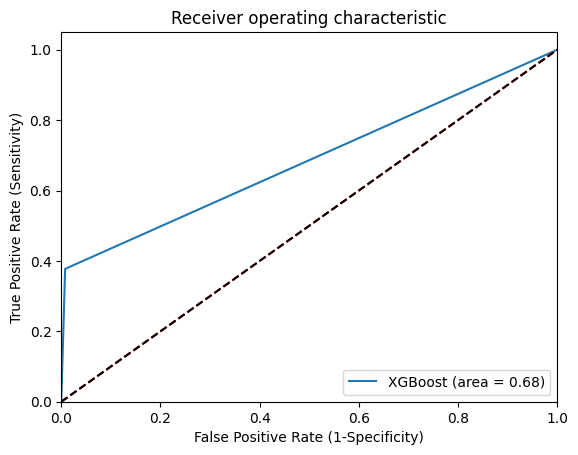

0.684818290821592
Ideal thresholds is 1    1
Name: thresholds, dtype: int32


In [126]:
#Confusion Matrix
import seaborn as sns
cf = confusion_matrix(y_test, y_pred,labels=[0,1])
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
x_axis_labels = ["Negative","Positive"] # labels for x-axis
y_axis_labels = ["Normal","Diabetes"] # labels for y-axis
ax = sns.heatmap(cf, annot=labels,fmt="",cmap='Blues',linecolor='black',xticklabels=x_axis_labels,yticklabels=y_axis_labels,linewidths=.5)
ax.tick_params(left=False, bottom=False)


ax.set(xlabel='Test Result', ylabel='Truth')
#plt.savefig("set1_cfm.png",bbox_inches='tight')
plt.show()
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('feature1_ROC')
plt.show()
from sklearn.metrics import auc
print(auc(fpr,tpr))
i=np.arange(len(tpr))
roc=pd.DataFrame({'tf':pd.Series(tpr-(1-fpr),index=i),'thresholds':pd.Series(thresholds,index=i)})
ideal_roc_thresh=roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print('Ideal thresholds is',ideal_roc_thresh['thresholds'])

In [127]:
df=pd.read_csv('C:/BME/FYP/ppg_device/data/ogtt/UKB_cohort_0_data.csv', index_col=0)
df=df.set_index('subject_id')
df=df.drop(columns=['record_date', "Heart_Rate"])
df=df.dropna()
df = df[df['AUC'] > 0]  # Drop rows where AUC is 0 or less
df=df.reset_index(drop=True)
df

,gender,age,height,weight,last_meal_time,ethnicity,diabetes,glucose_level,smoking,alcohol,md_so,md_sd,t_sd,md_do,sd_r,AUC
0,Male,60,168.0,94.2,10,"[""Prefer not to answer""]",No,4.874,Prefer not to answer,Prefer not to answer,5423.760436,4398.493138,0.200,1025.267298,0.810967,89335.22230
1,Female,63,168.0,71.9,3,"[""British""]",No,5.056,No,Three or four times a week,6551.140251,6771.208491,0.248,-220.068240,1.033592,89335.22230
2,Female,64,170.0,78.5,3,"[""British""]",No,4.595,No,Daily or almost daily,5428.841070,6296.923297,0.232,-868.082227,1.159902,69006.68128
3,Female,59,155.0,49.3,4,"[""British""]",No,5.493,No,Three or four times a week,5018.737353,7971.205363,0.392,-2952.468009,1.588289,35480.52958
4,Female,67,165.0,62.1,5,"[""British""]",No,4.503,No,Once or twice a week,5536.006182,5697.493691,0.232,-161.487508,1.029170,95213.42359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25096,Female,68,166.0,70.5,3,"[""British""]",No,5.585,No,Daily or almost daily,6754.470868,8572.427924,0.224,-1817.957056,1.269149,72794.28663
25097,Male,49,181.0,103.4,2,"[""White and Asian""]",No,5.577,No,One to three times a month,6208.875791,5290.935873,0.208,917.939918,0.852157,113687.98090
25098,Female,59,177.0,80.6,4,"[""British""]",No,5.450,No,Once or twice a week,5970.864612,6124.779863,0.256,-153.915251,1.025778,94516.20978
25099,Male,55,183.5,112.0,7,"[""British""]",No,9.184,No,Three or four times a week,5761.001437,6360.699422,0.224,-599.697985,1.104096,74488.70489


In [128]:
cols = [x for x in df.columns if x!='glucose_level']
X = df.loc[:,cols]
y = df['glucose_level']

diabetic=[None]*len(y)
for i in range (len(y)):
  if X['last_meal_time'].iloc[i]<3:
    if y.iloc[i]>=11.1:
      diabetic[i]=2
    elif y.iloc[i]<= 11.0 and y.iloc[i]>=7.8:
      diabetic[i]=1
    elif y.iloc[i]<7.8:
      diabetic[i]=0
  else:
    if y.iloc[i]>=7.0:
      diabetic[i]=2
    elif y.iloc[i]<7.0 and y.iloc[i]>=6.0:
      diabetic[i]=1
    elif y.iloc[i]<6.0:
      diabetic[i]=0



y=pd.Series(diabetic,index=y.index)

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
# 1. One-Hot Encoding for Categorical Variables
# Gender Encoding (Female -> 0, Male -> 1)
X['gender'] = (X['gender'] == 'Female').astype(int)

# Ethnicity One-Hot Encoding (flattening list first)
X = X.explode('ethnicity')
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
ethnicity_encoded = encoder.fit_transform(X[['ethnicity']])
ethnicity_df = pd.DataFrame(ethnicity_encoded, columns=encoder.get_feature_names_out(['ethnicity']))
X = pd.concat([X.reset_index(drop=True), ethnicity_df.reset_index(drop=True)], axis=1).drop('ethnicity', axis=1)

# # Diabetes Encoding (Yes -> 1, No -> 0)
X['diabetes'] = X['diabetes'].map({'Yes': 1, 'No': 0})

# Smoking and Alcohol One-Hot Encoding
X = pd.get_dummies(X, columns=['smoking', 'alcohol'])

# 2. Handling Missing Values with Imputation
# Using mean imputation for the columns with NaN values
imputer = SimpleImputer(strategy='mean')
X[['md_sd', 't_sd', 'md_do', 'sd_r']] = imputer.fit_transform(X[['md_sd', 't_sd', 'md_do', 'sd_r']])

# 3. Normalizing Numerical Columns
scaler = MinMaxScaler()  # You can switch to StandardScaler() for Z-score normalization

# List of columns to normalize
columns_to_normalize = ['age', 'height', 'weight', 'last_meal_time', 'md_so', 'AUC']

# Normalize
X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])
X.columns = X.columns.str.replace(r'ethnicity_\["(.*?)"\]', r'ethnicity_\1', regex=True)
X

,gender,age,height,weight,last_meal_time,diabetes,md_so,md_sd,t_sd,md_do,...,smoking_Only occasionally,smoking_Prefer not to answer,"smoking_Yes, on most or all days",alcohol_Daily or almost daily,alcohol_Never,alcohol_Once or twice a week,alcohol_One to three times a month,alcohol_Prefer not to answer,alcohol_Special occasions only,alcohol_Three or four times a week
0,0,0.677419,0.489051,0.404317,0.277778,0.0,0.654282,4398.493138,0.200,1025.267298,...,0,1,0,0,0,0,0,1,0,0
1,1,0.774194,0.489051,0.243885,0.083333,0.0,0.796179,6771.208491,0.248,-220.068240,...,0,0,0,0,0,0,0,0,0,1
2,1,0.806452,0.518248,0.291367,0.083333,0.0,0.654922,6296.923297,0.232,-868.082227,...,0,0,0,1,0,0,0,0,0,0
3,1,0.645161,0.299270,0.081295,0.111111,0.0,0.603304,7971.205363,0.392,-2952.468009,...,0,0,0,0,0,0,0,0,0,1
4,1,0.903226,0.445255,0.173381,0.138889,0.0,0.668410,5697.493691,0.232,-161.487508,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25096,1,0.935484,0.459854,0.233813,0.083333,0.0,0.821771,8572.427924,0.224,-1817.957056,...,0,0,0,1,0,0,0,0,0,0
25097,0,0.322581,0.678832,0.470504,0.055556,0.0,0.753100,5290.935873,0.208,917.939918,...,0,0,0,0,0,0,1,0,0,0
25098,1,0.645161,0.620438,0.306475,0.111111,0.0,0.723143,6124.779863,0.256,-153.915251,...,0,0,0,0,0,1,0,0,0,0
25099,0,0.516129,0.715328,0.532374,0.194444,0.0,0.696729,6360.699422,0.224,-599.697985,...,0,0,0,0,0,0,0,0,0,1


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [130]:
from xgboost import XGBClassifier
clf=XGBClassifier(objective='multi:softmax')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print('precision:', metrics.precision_score(y_test,y_pred))
# print('recall:', metrics.recall_score(y_test,y_pred))
# print('roc auc:', metrics.roc_auc_score(y_test,y_pred))

Accuracy: 0.931084849289603


In [131]:
import numpy as np
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('number of diabetes in y_train:', np.count_nonzero(y_train), 'out of', len(y_train))
print('number of diabetes in y_test:', np.count_nonzero(y_test), 'out of', len(y_test))
print('number of diabetes in y_pred:', np.count_nonzero(y_pred), 'out of', len(y_pred))

Accuracy: 0.931084849289603
number of diabetes in y_train: 1104 out of 17570
number of diabetes in y_test: 490 out of 7531
number of diabetes in y_pred: 113 out of 7531


[Text(0.5, 23.52222222222222, 'Test Result'),
 Text(50.72222222222221, 0.5, 'Truth')]

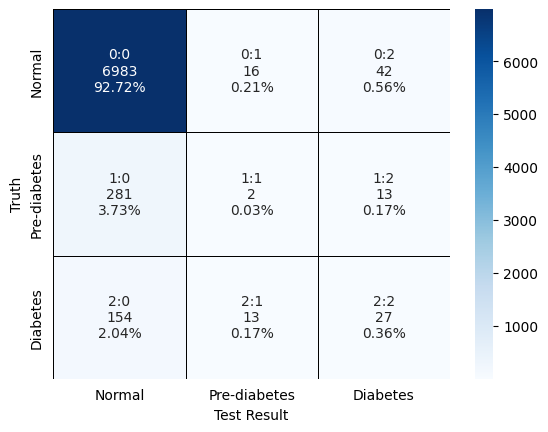

In [132]:
cf = confusion_matrix(y_test, y_pred,labels=[0,1,2])
group_names = ["0:0","0:1","0:2","1:0","1:1","1:2","2:0","2:1","2:2"]
group_counts = ["{0:0.0f}".format(value) for value in
cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
x_axis_labels = ["Normal","Pre-diabetes","Diabetes"] # labels for x-axis
y_axis_labels = ["Normal","Pre-diabetes","Diabetes"] # labels for y-axis
ax = sns.heatmap(cf, annot=labels,fmt="",cmap='Blues',linecolor='black',xticklabels=x_axis_labels,yticklabels=y_axis_labels,linewidths=.5)
ax.tick_params(left=False, bottom=False)


ax.set(xlabel='Test Result', ylabel='Truth')


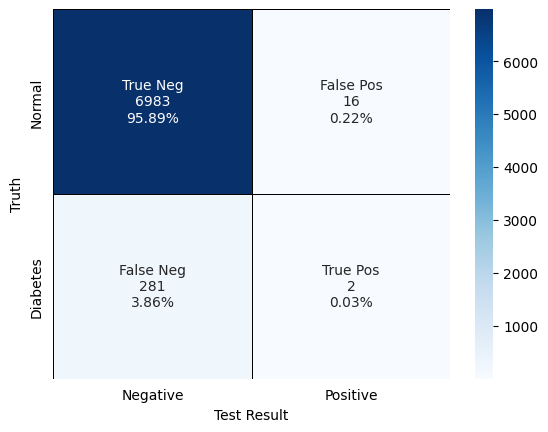

ValueError: multi_class must be in ('ovo', 'ovr')

In [133]:
#Confusion Matrix
import seaborn as sns
cf = confusion_matrix(y_test, y_pred,labels=[0,1])
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
x_axis_labels = ["Negative","Positive"] # labels for x-axis
y_axis_labels = ["Normal","Diabetes"] # labels for y-axis
ax = sns.heatmap(cf, annot=labels,fmt="",cmap='Blues',linecolor='black',xticklabels=x_axis_labels,yticklabels=y_axis_labels,linewidths=.5)
ax.tick_params(left=False, bottom=False)


ax.set(xlabel='Test Result', ylabel='Truth')
#plt.savefig("set1_cfm.png",bbox_inches='tight')
plt.show()
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('feature1_ROC')
plt.show()
from sklearn.metrics import auc
print(auc(fpr,tpr))
i=np.arange(len(tpr))
roc=pd.DataFrame({'tf':pd.Series(tpr-(1-fpr),index=i),'thresholds':pd.Series(thresholds,index=i)})
ideal_roc_thresh=roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print('Ideal thresholds is',ideal_roc_thresh['thresholds'])

In [32]:
new_df.to_csv('C:/BME/FYP/ppg_device/data/ogtt/ppg_cohort_0_processed.csv')
new_df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
1,1,78,235,485,827,1254,1763,2325,2921,3532,...,812,702,592,480,362,240,128,43,-2,1
1,-3,315,955,1794,2693,3498,4124,4699,5401,6205,...,973,927,871,816,704,443,174,-26,-92,-3
1,1,52,293,808,1629,2717,3963,5235,6411,7409,...,1070,936,802,669,535,400,269,148,51,1
1,1,47,192,471,951,1690,2692,3917,5279,6647,...,447,391,327,279,240,183,111,43,3,1
1,0,70,309,684,1146,1692,2301,2967,3673,4379,...,507,419,333,259,212,160,84,18,-17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1,68,234,507,891,1384,1973,2607,3268,3937,...,876,747,620,498,380,267,164,78,20,1
1,0,16,40,76,130,222,410,722,1170,1756,...,254,207,163,123,86,55,29,10,0,0
1,1,117,452,1053,1903,2938,4069,5204,6271,7221,...,956,849,734,614,487,357,230,114,27,1
1,2,85,320,832,1721,3022,4610,6236,7632,8626,...,809,719,631,519,390,276,185,90,17,2


In [51]:
new_df=pd.read_csv('C:/BME/FYP/ppg_device/data/ogtt/ppg_cohort_0_processed.csv', index_col=0)
new_df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
1,1,78,235,485,827,1254,1763,2325,2921,3532,...,812,702,592,480,362,240,128,43,-2,1
1,-3,315,955,1794,2693,3498,4124,4699,5401,6205,...,973,927,871,816,704,443,174,-26,-92,-3
1,1,52,293,808,1629,2717,3963,5235,6411,7409,...,1070,936,802,669,535,400,269,148,51,1
1,1,47,192,471,951,1690,2692,3917,5279,6647,...,447,391,327,279,240,183,111,43,3,1
1,0,70,309,684,1146,1692,2301,2967,3673,4379,...,507,419,333,259,212,160,84,18,-17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0,16,40,76,130,222,410,722,1170,1756,...,254,207,163,123,86,55,29,10,0,0
1,1,117,452,1053,1903,2938,4069,5204,6271,7221,...,956,849,734,614,487,357,230,114,27,1
1,2,85,320,832,1721,3022,4610,6236,7632,8626,...,809,719,631,519,390,276,185,90,17,2
1,0,51,221,538,1019,1667,2481,3379,4308,5230,...,675,590,505,421,336,250,166,90,30,0


In [54]:
params = {
    # ====================== Paths ===========================
    'data_path': 'C:/BME/FYP/ppg_device/data/ogtt',
    # a folder for storing the cached files
    'cache_path': 'C:/BME/FYP/ppg_device/data/new_cache',

    # ====================== Hardware params ===========================
    'slots': {
        'c': 'green',
        'd': 'red',
        'e': 'infrared',
    },

    'fs': 500,
    
    # ====================== Study params ===========================
    # the subject ID to be included in the study
    'subject_id': [1, 2, 3,4,6,7,8,9,10,11,12,13,14,15,16,17,18, 19,20,21],
    'subjects_exam': [],

    # segment duration in seconds
    'segment_duration': 40,

    # filtering frequencies
    'bandpass': (0.5, 6),
    # 'notch': 50.0,

    'sqi_thresh': 90,
    # 'run_name': 'first_trial',
    # 'experiment_name': 'donut',
}

In [66]:
new_df=new_df.reset_index()

In [69]:
new_df=new_df.drop(columns=['index'])

In [77]:
new_df.iloc[:,0]

0        1
1       -3
2        1
3        1
4        0
        ..
29995    0
29996    1
29997    2
29998    0
29999    0
Name: 1, Length: 30000, dtype: int64

In [138]:
df=pd.read_csv('C:/BME/FYP/ppg_device/data/ogtt/UKB_cohort_0_data.csv', index_col=0)
df=df.set_index('subject_id')
df=df.drop(columns=['record_date', "Heart_Rate"])
df=df.dropna()
df = df[df['AUC'] > 0]  # Drop rows where AUC is 0 or less
df=df.reset_index(drop=True)
df

,gender,age,height,weight,last_meal_time,ethnicity,diabetes,glucose_level,smoking,alcohol,md_so,md_sd,t_sd,md_do,sd_r,AUC
0,Male,60,168.0,94.2,10,"[""Prefer not to answer""]",No,4.874,Prefer not to answer,Prefer not to answer,5423.760436,4398.493138,0.200,1025.267298,0.810967,89335.22230
1,Female,63,168.0,71.9,3,"[""British""]",No,5.056,No,Three or four times a week,6551.140251,6771.208491,0.248,-220.068240,1.033592,89335.22230
2,Female,64,170.0,78.5,3,"[""British""]",No,4.595,No,Daily or almost daily,5428.841070,6296.923297,0.232,-868.082227,1.159902,69006.68128
3,Female,59,155.0,49.3,4,"[""British""]",No,5.493,No,Three or four times a week,5018.737353,7971.205363,0.392,-2952.468009,1.588289,35480.52958
4,Female,67,165.0,62.1,5,"[""British""]",No,4.503,No,Once or twice a week,5536.006182,5697.493691,0.232,-161.487508,1.029170,95213.42359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25096,Female,68,166.0,70.5,3,"[""British""]",No,5.585,No,Daily or almost daily,6754.470868,8572.427924,0.224,-1817.957056,1.269149,72794.28663
25097,Male,49,181.0,103.4,2,"[""White and Asian""]",No,5.577,No,One to three times a month,6208.875791,5290.935873,0.208,917.939918,0.852157,113687.98090
25098,Female,59,177.0,80.6,4,"[""British""]",No,5.450,No,Once or twice a week,5970.864612,6124.779863,0.256,-153.915251,1.025778,94516.20978
25099,Male,55,183.5,112.0,7,"[""British""]",No,9.184,No,Three or four times a week,5761.001437,6360.699422,0.224,-599.697985,1.104096,74488.70489


In [104]:
df.describe()

,age,height,weight,last_meal_time,glucose_level,md_so,md_sd,t_sd,md_do,sd_r,AUC
count,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000
mean,56.340305,169.017183,78.748934,3.824509,5.184655,5271.388296,5871.511440,0.232447,-600.123144,1.205516,68208.398348
std,8.163438,9.299494,16.163325,1.973025,1.133750,1166.525680,1102.237710,0.042272,1202.155817,0.602932,23275.799901
min,39.000000,134.500000,38.000000,0.000000,1.005000,225.444349,79.540938,0.072000,-7580.358419,0.177489,22.546919
25%,50.000000,162.000000,67.000000,3.000000,4.698000,4778.210521,5142.747470,0.216000,-899.009594,1.005070,52642.944990
50%,57.000000,169.000000,77.100000,4.000000,5.007000,5367.770470,5790.022693,0.224000,-492.810137,1.091363,69481.905590
75%,63.000000,176.000000,88.600000,5.000000,5.372000,6050.502022,6555.429561,0.240000,-27.614231,1.169347,85849.116610
max,70.000000,203.000000,177.000000,36.000000,24.365000,8170.513371,11066.797120,0.600000,3362.961912,15.003540,126456.494700


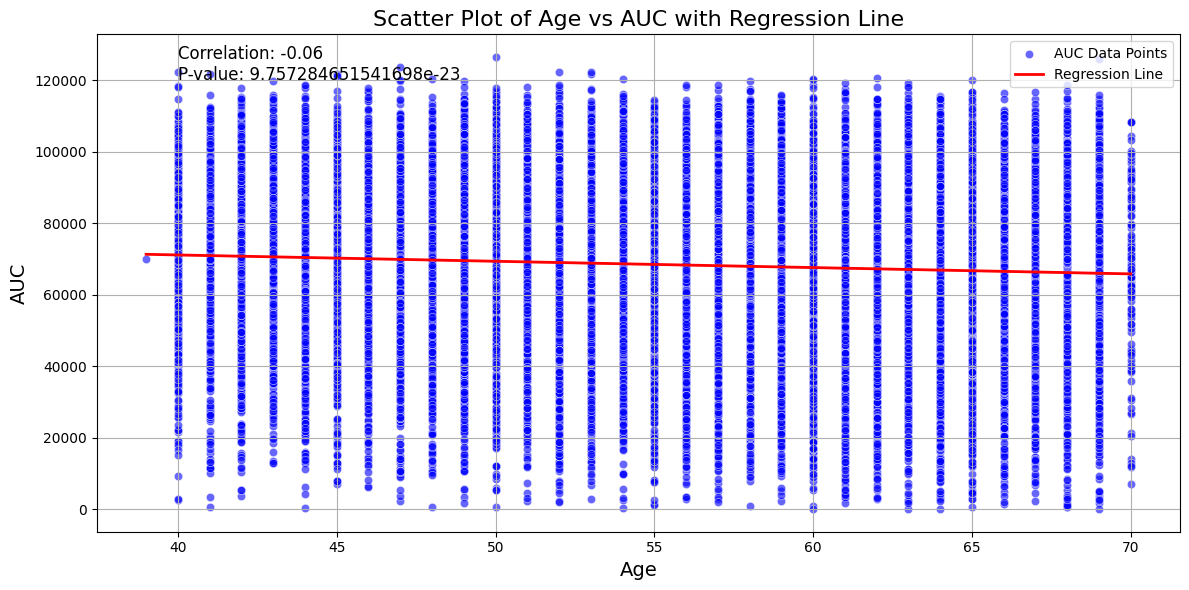

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Ensure the generated data respects the min and max limits
df['age'] = df['age'].clip(lower=df.describe()['age']['min'], upper=df.describe()['age']['max']).astype(int)  # Clipping age to the provided range
# df['AUC'] = df['AUC'].clip(lower=0)  # Clipping AUC to ensure no negative values

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = stats.pearsonr(df['age'], df['AUC'])

# Fit a linear regression model
X = sm.add_constant(df['age'])  # Adding a constant for intercept
model = sm.OLS(df['AUC'], X).fit()

# Get the regression line values
df['predicted_AUC'] = model.predict(X)

# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='AUC', data=df, alpha=0.6, color='blue', label='AUC Data Points')
sns.lineplot(x='age', y='predicted_AUC', data=df, color='red', label='Regression Line', linewidth=2)

# Add text for correlation and p-value
plt.text(40, 120000, f'Correlation: {correlation:.2f}\nP-value: {p_value}', 
         fontsize=12, color='black', ha='left')

# Customize the plot
plt.title('Scatter Plot of Age vs AUC with Regression Line', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('AUC', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


ANOVA F-statistic: nan, p-value: nan
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
         group1                   group2           meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------------------------------------
      Group 1 (Age < 50) Group 2 (50 <= Age < 55) -1923.1327 0.0114  -3554.167  -292.0984   True
      Group 1 (Age < 50) Group 3 (55 <= Age < 60)  -2360.619 0.0004 -3938.9811  -782.2569   True
      Group 1 (Age < 50) Group 4 (60 <= Age < 65) -3357.9871    0.0 -4895.1596 -1820.8145   True
      Group 1 (Age < 50)      Group 5 (Age >= 65) -3977.5708    0.0 -5432.5392 -2522.6024   True
Group 2 (50 <= Age < 55) Group 3 (55 <= Age < 60)  -437.4863 0.9317 -1935.6116  1060.6391  False
Group 2 (50 <= Age < 55) Group 4 (60 <= Age < 65) -1434.8544 0.0553 -2889.5199    19.8112  False
Group 2 (50 <= Age < 55)      Group 5 (Age >= 65) -2054.4381 0.0004 -3421.9489  -686.9274 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19428\2144111126.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='AUC', data=df, palette='Set2')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19428\2144111126.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='AUC', data=df, palette='Set2')


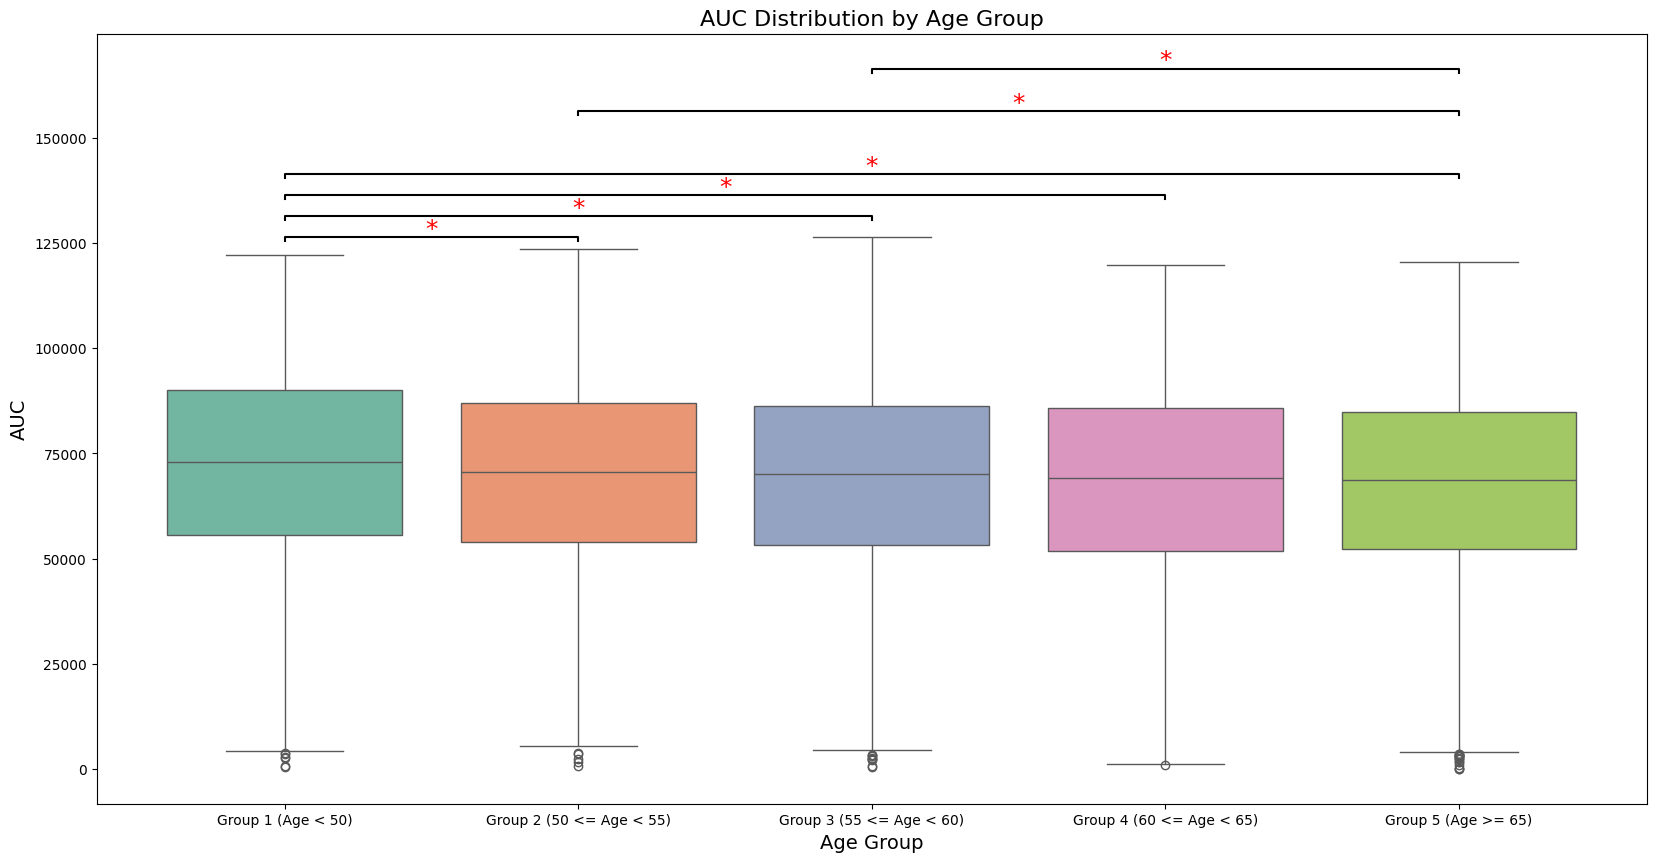

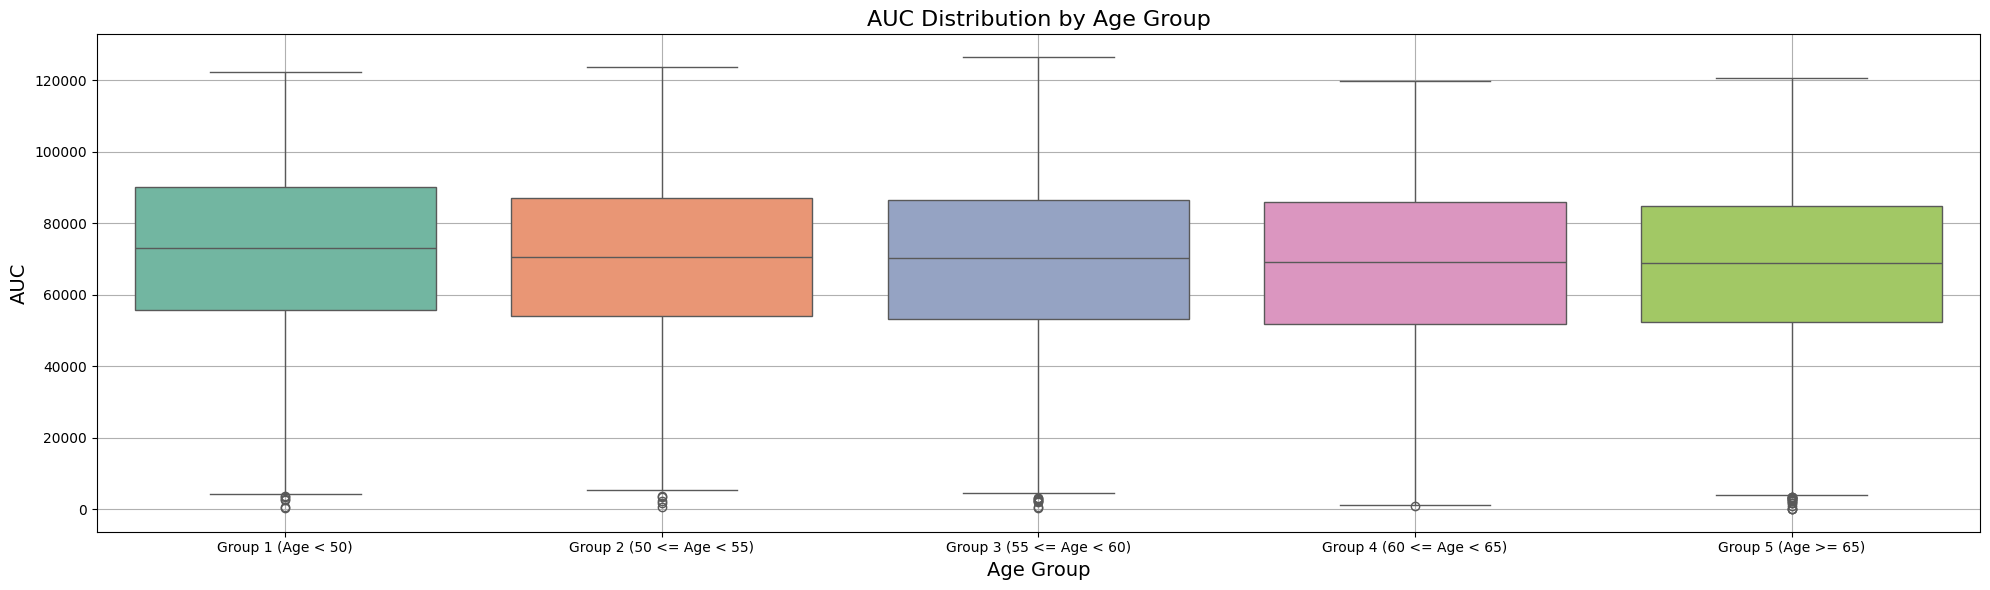

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define age groups
bins = [39, 45, 50, 55, 60, 65]  # Define bins for age groups
labels = ['Group 1 (Age < 50)', 'Group 2 (50 <= Age < 55)',  'Group 3 (55 <= Age < 60)',  'Group 4 (60 <= Age < 65)', 'Group 5 (Age >= 65)']

# Bin the ages into categories and drop rows with NaN values (if age is out of range)
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df = df.dropna(subset=['age_group'])  # Remove any NaN age groups

# Perform ANOVA
f_stat, p_value = stats.f_oneway(
    df['AUC'][df['age_group'] == 'Group 1 (Age < 50)'],
    df['AUC'][df['age_group'] == 'Group 2 (50 <= Age < 60)'],
    df['AUC'][df['age_group'] == 'Group 3 (55 <= Age < 60)'],
    df['AUC'][df['age_group'] == 'Group 4 (60 <= Age < 65)'],
    df['AUC'][df['age_group'] == 'Group 5 (Age >= 65)']

)
print(f"ANOVA F-statistic: {f_stat:.5f}, p-value: {p_value:.5f}")

# Perform Tukey's HSD post-hoc test
tukey_result = pairwise_tukeyhsd(endog=df['AUC'], groups=df['age_group'], alpha=0.05)
print(tukey_result)

# Visualization
plt.figure(figsize=(20, 10))
sns.boxplot(x='age_group', y='AUC', data=df, palette='Set2')
plt.title('AUC Distribution by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('AUC', fontsize=14)

# Annotate significant differences on the plot with lines and asterisks
summary_df = pd.DataFrame(data=tukey_result.summary().data[1:], columns=tukey_result.summary().data[0])

# Iterate through the significant differences in Tukey's test
for i in range(len(summary_df)):
    if summary_df['reject'][i]:  # If the comparison is significant
        group1 = summary_df['group1'][i]
        group2 = summary_df['group2'][i]
        
        # Get the x-axis positions for the groups
        x1 = list(df['age_group'].cat.categories).index(group1)
        x2 = list(df['age_group'].cat.categories).index(group2)
        
        # Calculate midpoint and height for annotation
        x_mid = (x1 + x2) / 2
        y_max = max(df['AUC']) + 10 + (i * 5000)  # Adjust the height dynamically to avoid overlap
        
        # Plot the line connecting the two groups
        plt.plot([x1, x1, x2, x2], [y_max - 1000, y_max, y_max, y_max - 1000], lw=1.5, color='black')

        # Plot the asterisk for significant difference above the line
        plt.text(x_mid, y_max + 200, '*', fontsize=18, color='red', ha='center')

# Visualization
plt.figure(figsize=(20, 6))
sns.boxplot(x='age_group', y='AUC', data=df, palette='Set2')
plt.title('AUC Distribution by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('AUC', fontsize=14)

plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [107]:
a=[]
b=[]
c=[]
for i in range (len(df)):
  if df['age'].iloc[i]<50:
    a.append(i)
  elif df['age'].iloc[i]<60 and df['age'].iloc[i]>=50:
    b.append(i)
  else:
    c.append(i)

first=df.iloc[a,:]
second=df.iloc[b,:]
third=df.iloc[c,:]

group1=first.describe()
group2=second.describe()
group3=third.describe()
group1=group1.rename(columns={"age": "age_group1", "AUC": "AUC_group1"})
group2=group2.rename(columns={"age": "age_group2", "AUC": "AUC_group2"})
group3=group3.rename(columns={"age": "age_group3", "AUC": "AUC_group3"})

# df_merged
df_merged = pd.concat([group1.loc[:,['AUC_group1']], group2.loc[:,['AUC_group2']], group3.loc[:,['AUC_group3']]], sort=False, axis=1)
df_merged

,AUC_group1,AUC_group2,AUC_group3
count,6089.000000,8284.000000,6052.000000
mean,70266.231868,68424.850850,67339.451402
std,23152.906370,23435.672862,23034.843748
min,413.789792,346.861998,24.718694
25%,54715.414870,52629.321450,52220.145630
50%,71655.280250,69605.195640,68755.587350
75%,88187.324580,86093.819015,84733.262778
max,123531.022400,126456.494700,120509.115700


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19428\355991682.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


ANOVA F-statistic: 24.75070, p-value: 0.00000
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
         group1                   group2           meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------------------------------------
      Group 1 (Age < 50) Group 2 (50 <= Age < 60)  -1841.381    0.0 -2760.6122  -922.1499   True
      Group 1 (Age < 50)      Group 3 (Age >= 60) -2926.7805    0.0 -3915.2171 -1938.3438   True
Group 2 (50 <= Age < 60)      Group 3 (Age >= 60) -1085.3994 0.0158 -2006.2487  -164.5502   True
------------------------------------------------------------------------------------------------


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19428\355991682.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='AUC', data=df, palette='Set2')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19428\355991682.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='AUC', data=df, palette='Set2')


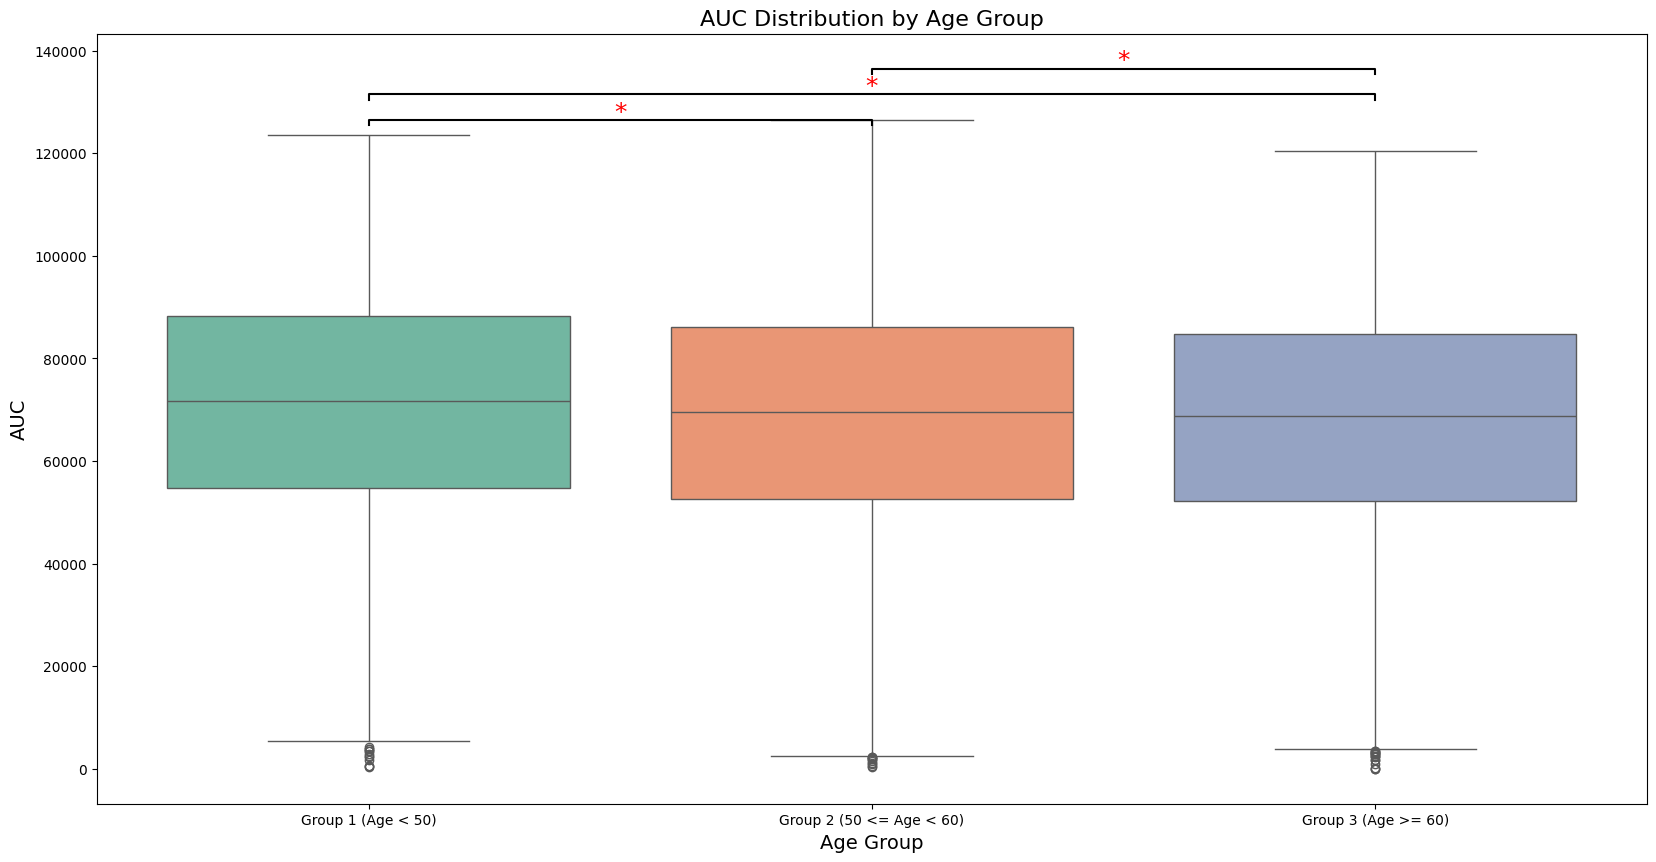

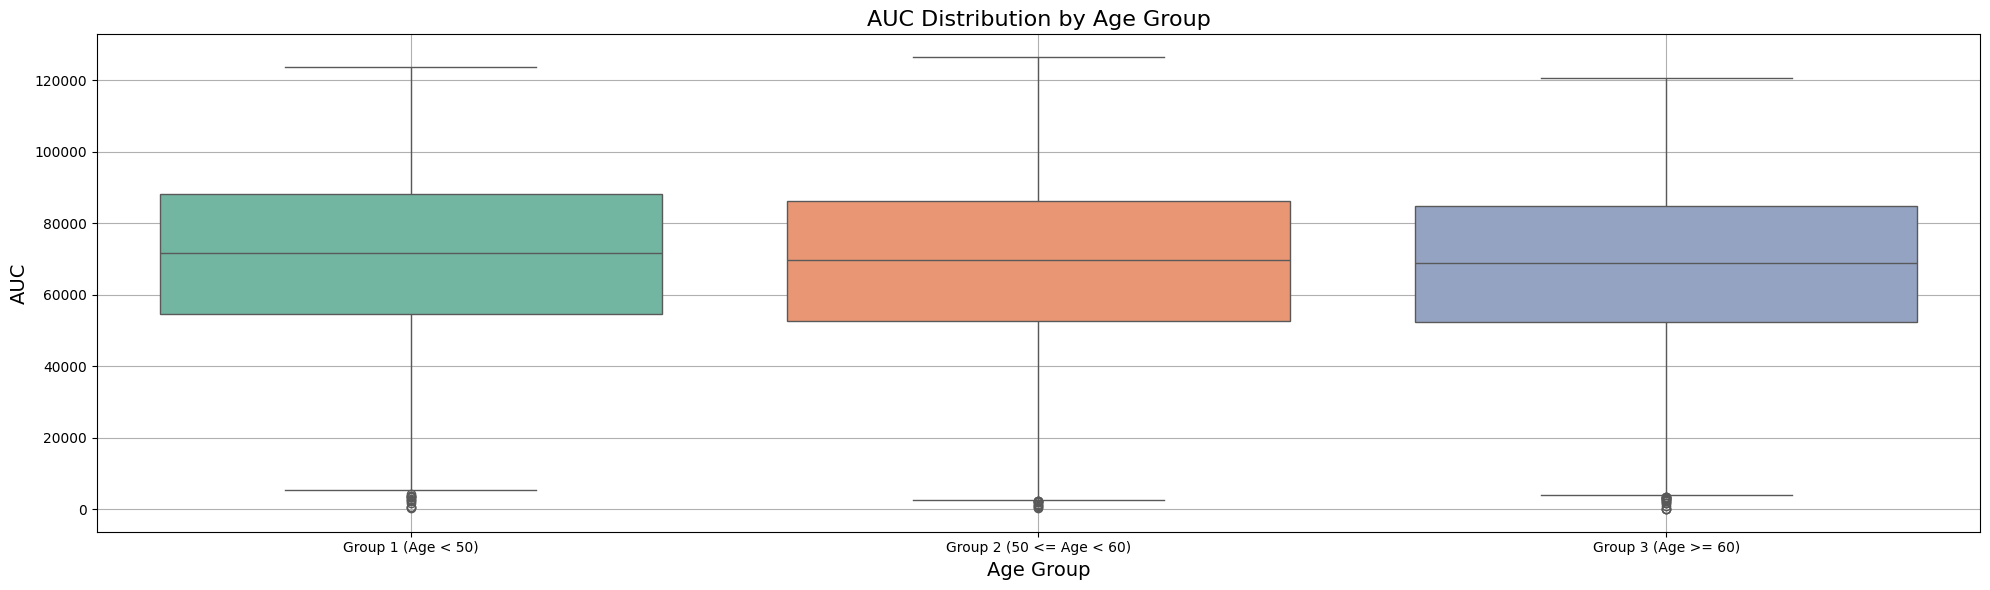

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define age groups
bins = [39, 50, 60, 70]  # Define bins for age groups
labels = ['Group 1 (Age < 50)', 'Group 2 (50 <= Age < 60)', 'Group 3 (Age >= 60)']

# Bin the ages into categories and drop rows with NaN values (if age is out of range)
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df = df.dropna(subset=['age_group'])  # Remove any NaN age groups

# Perform ANOVA
f_stat, p_value = stats.f_oneway(
    df['AUC'][df['age_group'] == 'Group 1 (Age < 50)'],
    df['AUC'][df['age_group'] == 'Group 2 (50 <= Age < 60)'],
    df['AUC'][df['age_group'] == 'Group 3 (Age >= 60)']
)
print(f"ANOVA F-statistic: {f_stat:.5f}, p-value: {p_value:.5f}")

# Perform Tukey's HSD post-hoc test
tukey_result = pairwise_tukeyhsd(endog=df['AUC'], groups=df['age_group'], alpha=0.05)
print(tukey_result)

# Visualization
plt.figure(figsize=(20, 10))
sns.boxplot(x='age_group', y='AUC', data=df, palette='Set2')
plt.title('AUC Distribution by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('AUC', fontsize=14)

# Annotate significant differences on the plot with lines and asterisks
summary_df = pd.DataFrame(data=tukey_result.summary().data[1:], columns=tukey_result.summary().data[0])

# Iterate through the significant differences in Tukey's test
for i in range(len(summary_df)):
    if summary_df['reject'][i]:  # If the comparison is significant
        group1 = summary_df['group1'][i]
        group2 = summary_df['group2'][i]
        
        # Get the x-axis positions for the groups
        x1 = list(df['age_group'].cat.categories).index(group1)
        x2 = list(df['age_group'].cat.categories).index(group2)
        
        # Calculate midpoint and height for annotation
        x_mid = (x1 + x2) / 2
        y_max = max(df['AUC']) + 10 + (i * 5000)  # Adjust the height dynamically to avoid overlap
        
        # Plot the line connecting the two groups
        plt.plot([x1, x1, x2, x2], [y_max - 1000, y_max, y_max, y_max - 1000], lw=1.5, color='black')

        # Plot the asterisk for significant difference above the line
        plt.text(x_mid, y_max + 200, '*', fontsize=18, color='red', ha='center')

# Visualization
plt.figure(figsize=(20, 6))
sns.boxplot(x='age_group', y='AUC', data=df, palette='Set2')
plt.title('AUC Distribution by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('AUC', fontsize=14)

plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


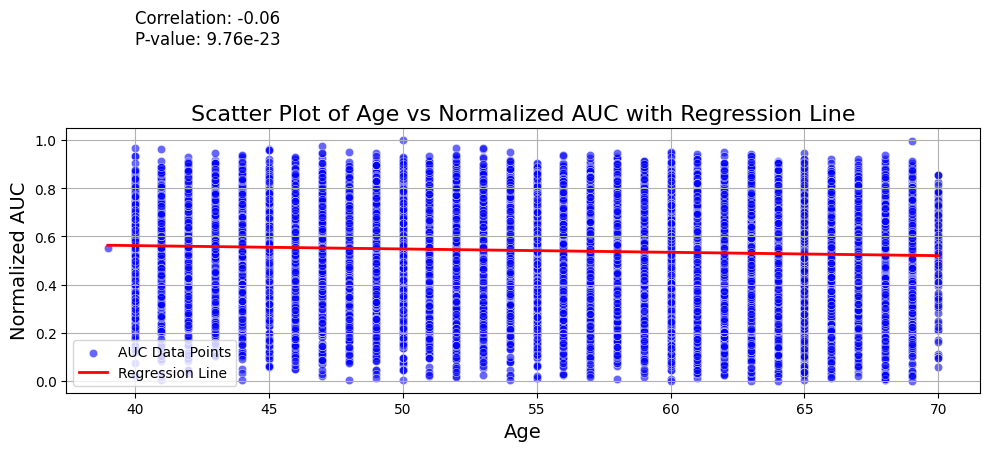

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Normalize AUC using log scale (log-transform the values)
# 3. Normalizing Numerical Columns
scaler = MinMaxScaler()  # You can switch to StandardScaler() for Z-score normalization

# List of columns to normalize
columns_to_normalize = ['AUC']

# Normalize
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = stats.pearsonr(df['age'], df['AUC'])

# Fit a linear regression model
X = sm.add_constant(df['age'])  # Adding a constant for intercept
model = sm.OLS(df['AUC'], X).fit()

# Get the regression line values
df['predicted_AUC'] = model.predict(X)

# Visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(x='age', y='AUC', data=df, alpha=0.6, color='blue', label='AUC Data Points')
sns.lineplot(x='age', y='predicted_AUC', data=df, color='red', label='Regression Line', linewidth=2)

# Add text for correlation and p-value
plt.text(40, 1.4, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', 
         fontsize=12, color='black', ha='left')

# Customize the plot
plt.title('Scatter Plot of Age vs Normalized AUC with Regression Line', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Normalized AUC', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


ANOVA F-statistic: 32.69291, p-value: 0.00000
                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------
      Group 1 (Age < 50) Group 2 (50 <= Age < 60)  -0.0329 0.0001 -0.0519 -0.0139   True
      Group 1 (Age < 50)      Group 3 (Age >= 60)  -0.0619    0.0   -0.08 -0.0438   True
Group 2 (50 <= Age < 60)      Group 3 (Age >= 60)   -0.029 0.0001 -0.0455 -0.0125   True
----------------------------------------------------------------------------------------


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19428\1495146123.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='AUC', data=df, palette='Set2')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19428\1495146123.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='AUC', data=df, palette='Set2')


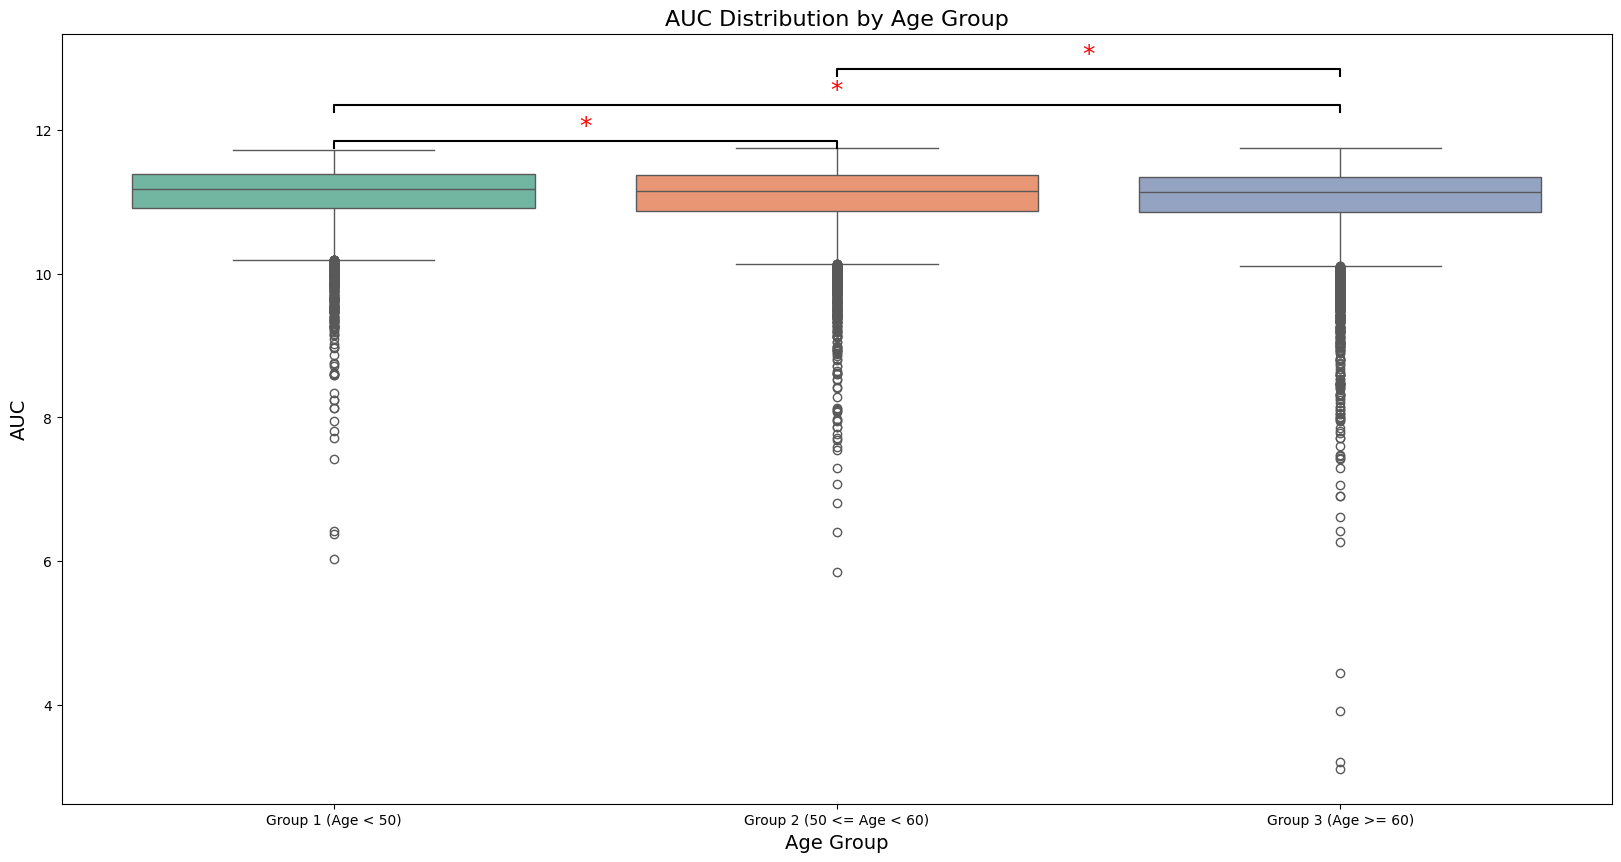

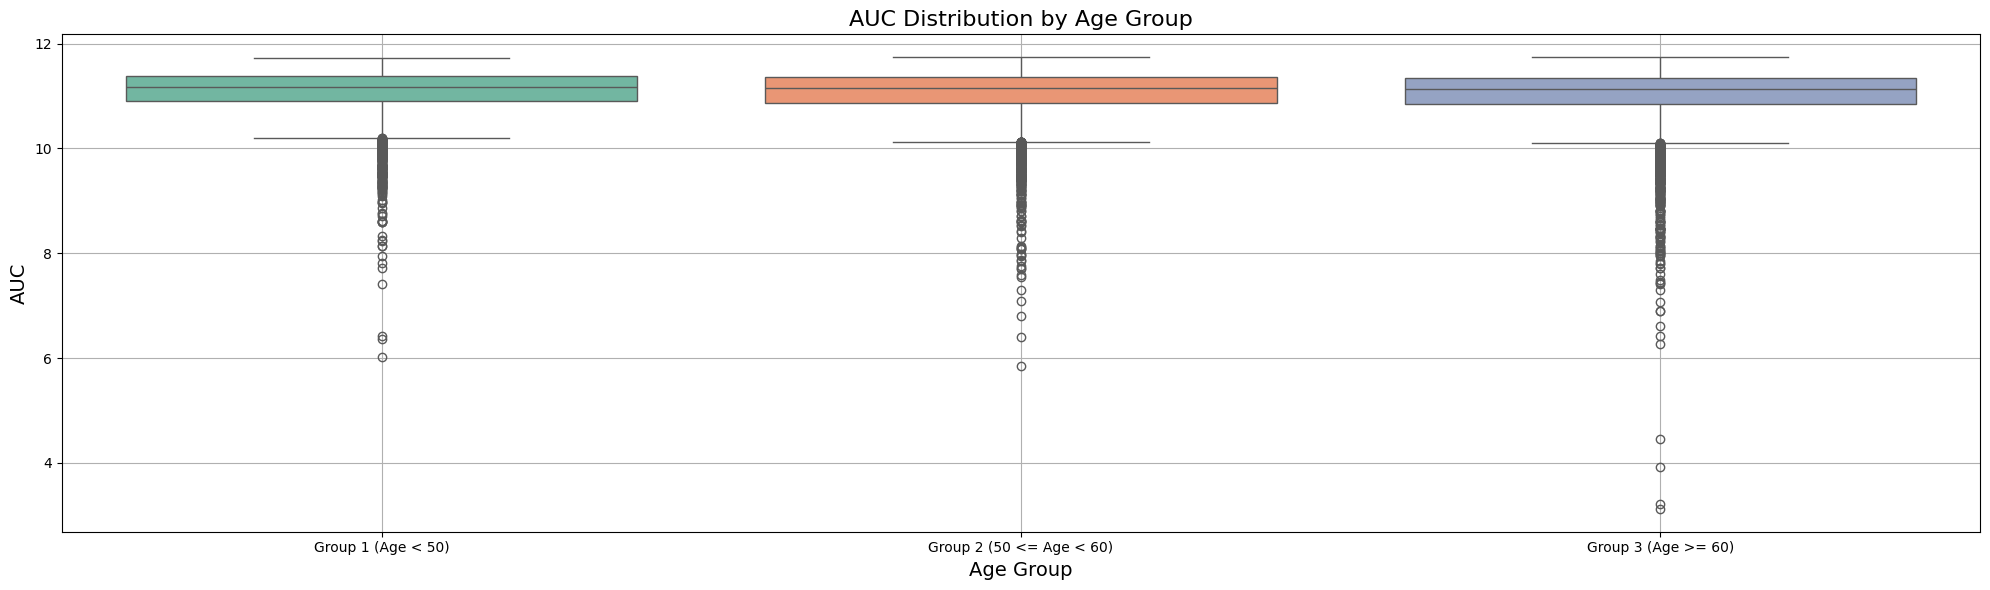

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define age groups
bins = [39, 50, 60, 70]  # Define bins for age groups
labels = ['Group 1 (Age < 50)', 'Group 2 (50 <= Age < 60)', 'Group 3 (Age >= 60)']

# Bin the ages into categories and drop rows with NaN values (if age is out of range)
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df = df.dropna(subset=['age_group'])  # Remove any NaN age groups

# Perform ANOVA
f_stat, p_value = stats.f_oneway(
    df['AUC'][df['age_group'] == 'Group 1 (Age < 50)'],
    df['AUC'][df['age_group'] == 'Group 2 (50 <= Age < 60)'],
    df['AUC'][df['age_group'] == 'Group 3 (Age >= 60)']
)
print(f"ANOVA F-statistic: {f_stat:.5f}, p-value: {p_value:.5f}")

# Perform Tukey's HSD post-hoc test
tukey_result = pairwise_tukeyhsd(endog=df['AUC'], groups=df['age_group'], alpha=0.05)
print(tukey_result)

# Visualization
plt.figure(figsize=(20, 10))
sns.boxplot(x='age_group', y='AUC', data=df, palette='Set2')
plt.title('AUC Distribution by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('AUC', fontsize=14)

# Annotate significant differences on the plot with lines and asterisks
summary_df = pd.DataFrame(data=tukey_result.summary().data[1:], columns=tukey_result.summary().data[0])

# Iterate through the significant differences in Tukey's test
for i in range(len(summary_df)):
    if summary_df['reject'][i]:  # If the comparison is significant
        group1 = summary_df['group1'][i]
        group2 = summary_df['group2'][i]
        
        # Get the x-axis positions for the groups
        x1 = list(df['age_group'].cat.categories).index(group1)
        x2 = list(df['age_group'].cat.categories).index(group2)
        
        # Calculate midpoint and height for annotation
        x_mid = (x1 + x2) / 2
        y_max = max(df['AUC']) + 0.1 + (i*0.5) # Adjust the height dynamically to avoid overlap
        
        # Plot the line connecting the two groups
        plt.plot([x1, x1, x2, x2], [y_max - 0.1, y_max, y_max, y_max - 0.1], lw=1.5, color='black')

        # Plot the asterisk for significant difference above the line
        plt.text(x_mid, y_max + 0.1, '*', fontsize=18, color='red', ha='center')

# Visualization
plt.figure(figsize=(20, 6))
sns.boxplot(x='age_group', y='AUC', data=df, palette='Set2')
plt.title('AUC Distribution by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('AUC', fontsize=14)

plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


ANOVA F-statistic: 41.61383, p-value: 0.00000
                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                   group2          meandiff p-adj  lower   upper  reject
---------------------------------------------------------------------------------------
      Group 1 (Age < 50) Group 2 (50 <= Age < 60)  -0.0146   0.0 -0.0218 -0.0073   True
      Group 1 (Age < 50)      Group 3 (Age >= 60)  -0.0268   0.0 -0.0337 -0.0199   True
Group 2 (50 <= Age < 60)      Group 3 (Age >= 60)  -0.0122   0.0 -0.0185 -0.0059   True
---------------------------------------------------------------------------------------


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19428\1310880541.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='AUC', data=df, palette='Set2')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19428\1310880541.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='AUC', data=df, palette='Set2')


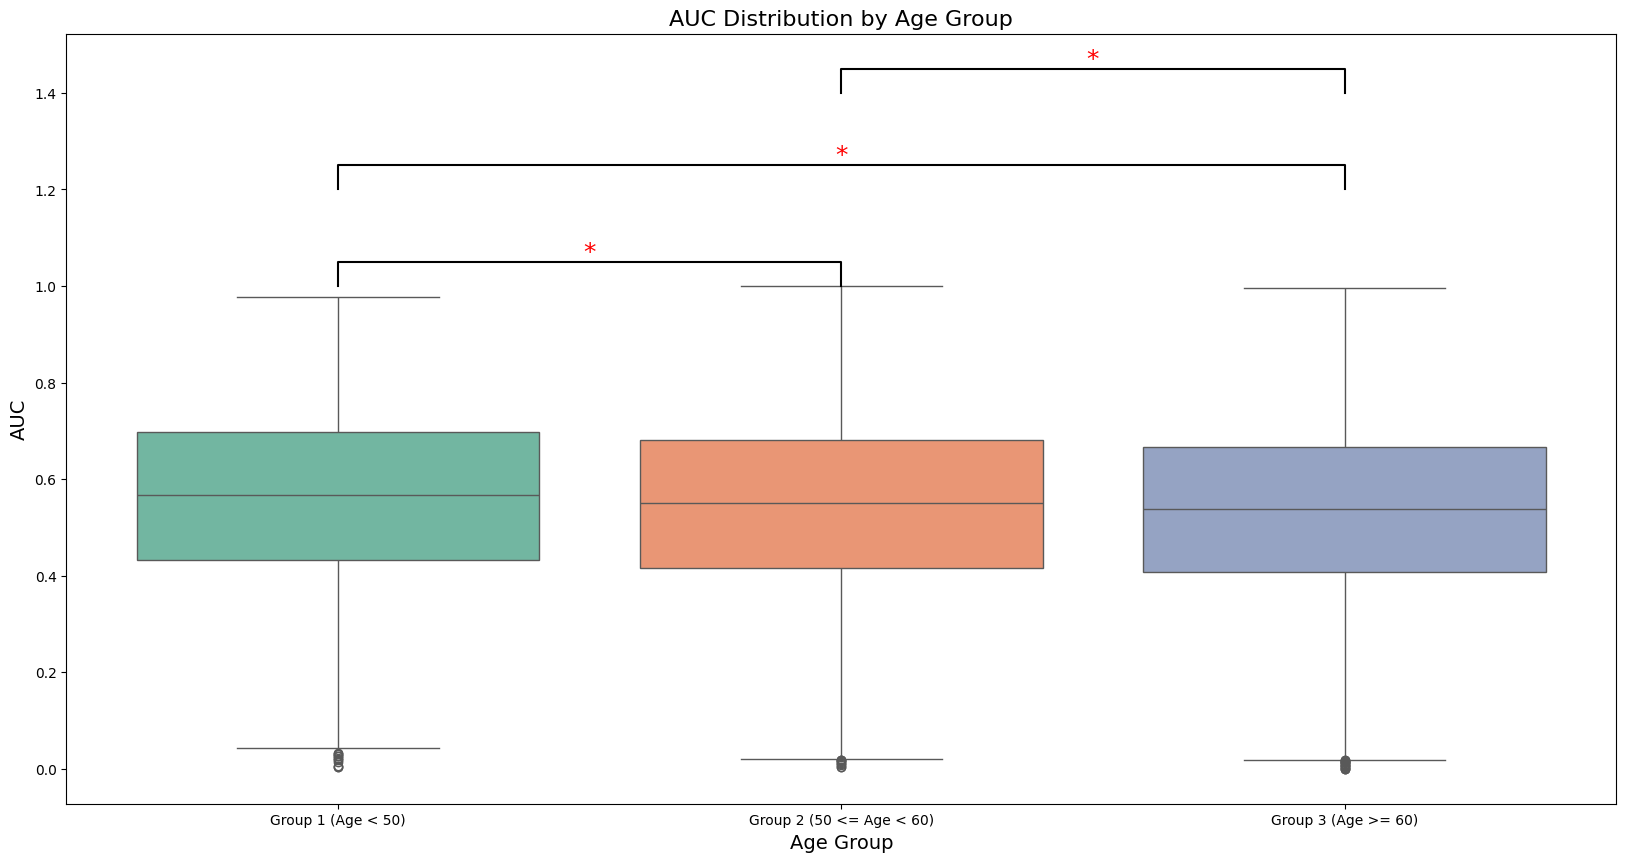

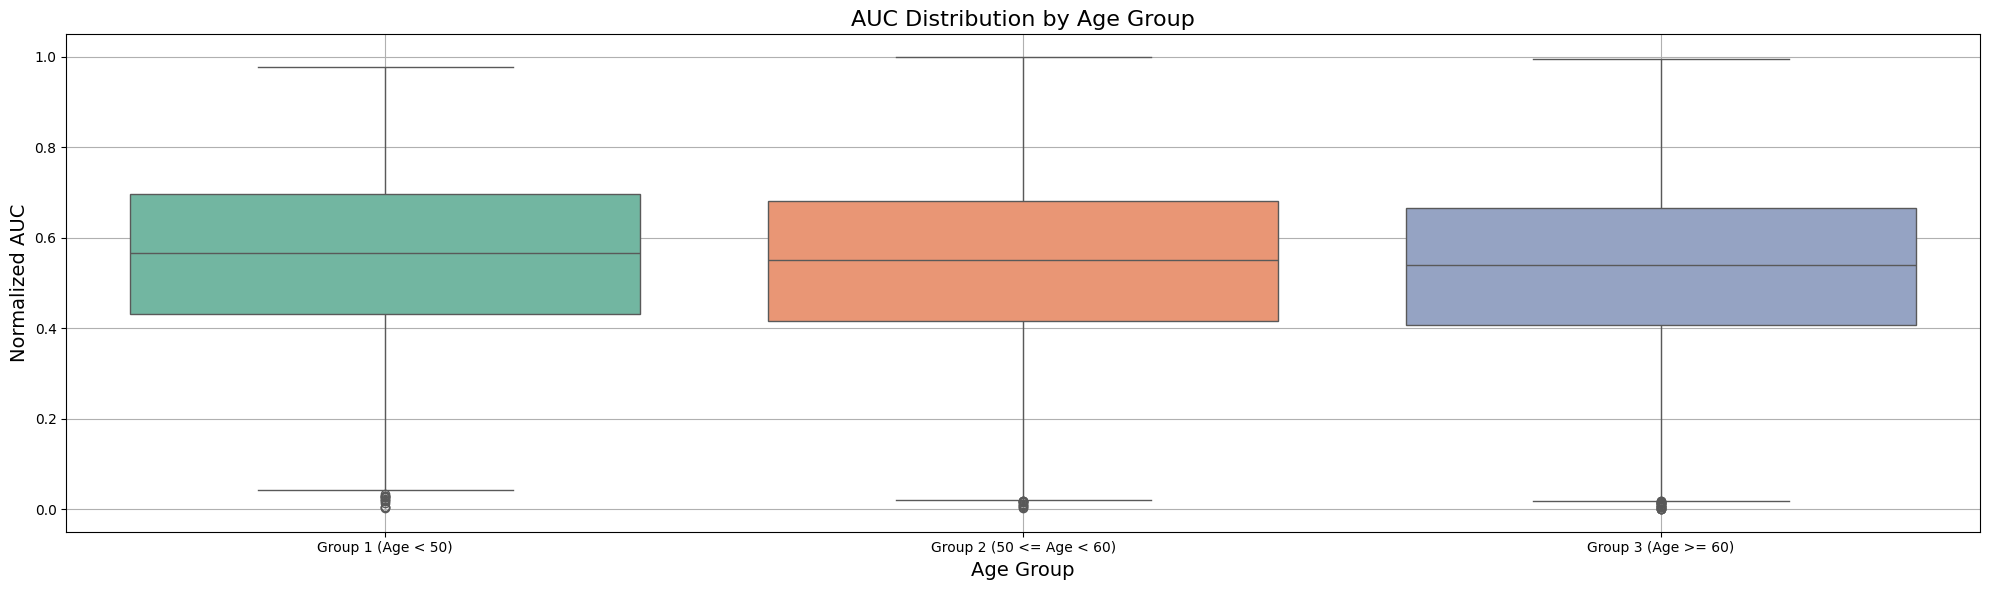

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define age groups
bins = [39, 50, 60, 70]  # Define bins for age groups
labels = ['Group 1 (Age < 50)', 'Group 2 (50 <= Age < 60)', 'Group 3 (Age >= 60)']

# Bin the ages into categories and drop rows with NaN values (if age is out of range)
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df = df.dropna(subset=['age_group'])  # Remove any NaN age groups

# Perform ANOVA
f_stat, p_value = stats.f_oneway(
    df['AUC'][df['age_group'] == 'Group 1 (Age < 50)'],
    df['AUC'][df['age_group'] == 'Group 2 (50 <= Age < 60)'],
    df['AUC'][df['age_group'] == 'Group 3 (Age >= 60)']
)
print(f"ANOVA F-statistic: {f_stat:.5f}, p-value: {p_value:.5f}")

# Perform Tukey's HSD post-hoc test
tukey_result = pairwise_tukeyhsd(endog=df['AUC'], groups=df['age_group'], alpha=0.05)
print(tukey_result)

# Visualization
plt.figure(figsize=(20, 10))
sns.boxplot(x='age_group', y='AUC', data=df, palette='Set2')
plt.title('AUC Distribution by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('AUC', fontsize=14)

# Annotate significant differences on the plot with lines and asterisks
summary_df = pd.DataFrame(data=tukey_result.summary().data[1:], columns=tukey_result.summary().data[0])

# Iterate through the significant differences in Tukey's test
for i in range(len(summary_df)):
    if summary_df['reject'][i]:  # If the comparison is significant
        group1 = summary_df['group1'][i]
        group2 = summary_df['group2'][i]
        
        # Get the x-axis positions for the groups
        x1 = list(df['age_group'].cat.categories).index(group1)
        x2 = list(df['age_group'].cat.categories).index(group2)
        
        # Calculate midpoint and height for annotation
        x_mid = (x1 + x2) / 2
        y_max = max(df['AUC']) + 0.05 + (i*0.2) # Adjust the height dynamically to avoid overlap
        
        # Plot the line connecting the two groups
        plt.plot([x1, x1, x2, x2], [y_max - 0.05, y_max, y_max, y_max - 0.05], lw=1.5, color='black')

        # Plot the asterisk for significant difference above the line
        plt.text(x_mid, y_max + 0.005, '*', fontsize=18, color='red', ha='center')

# Visualization
plt.figure(figsize=(20, 6))
sns.boxplot(x='age_group', y='AUC', data=df, palette='Set2')
plt.title('AUC Distribution by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Normalized AUC', fontsize=14)

plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [86]:
first=df.iloc[a,:]
first

,gender,age,height,weight,last_meal_time,ethnicity,diabetes,glucose_level,smoking,alcohol,md_so,md_sd,t_sd,md_do,sd_r,AUC
7,Female,45,172.0,88.8,4,"[""British""]",No,4.903,No,Once or twice a week,6589.693605,7021.064130,0.272,-431.370525,1.065461,65678.66881
8,Female,48,155.0,65.0,6,"[""British""]",No,6.414,"Yes, on most or all days",Never,4592.176141,5371.127523,0.216,-778.951382,1.169626,41269.05073
11,Male,47,164.0,69.0,3,"[""Any other mixed background""]",No,6.080,No,Special occasions only,5085.168958,5011.596548,0.216,73.572410,0.985532,74788.26698
13,Male,49,170.0,63.2,2,"[""British""]",No,3.789,No,Three or four times a week,5515.554373,3866.004712,0.168,1649.549661,0.700928,56209.83717
18,Female,46,156.0,59.8,4,"[""Other ethnic group""]",No,4.081,No,Never,6276.317095,7206.639445,0.296,-930.322349,1.148227,99368.02008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25316,Female,42,165.0,79.5,5,"[""Other ethnic group""]",No,5.074,No,Never,4850.590841,5257.699910,0.248,-407.109069,1.083930,59975.27001
25317,Male,45,180.0,92.5,3,"[""British""]",No,4.099,No,Special occasions only,5251.981009,4493.271954,0.208,758.709055,0.855538,85800.30596
25322,Male,46,171.0,82.4,4,"[""British""]",No,4.778,No,Daily or almost daily,4353.787173,4269.345493,0.208,84.441680,0.980605,52334.73057
25328,Male,49,181.0,103.4,2,"[""White and Asian""]",No,5.577,No,One to three times a month,6208.875791,5290.935873,0.208,917.939918,0.852157,113687.98090


In [93]:
first.describe()

,age,height,weight,last_meal_time,glucose_level,md_so,md_sd,t_sd,md_do,sd_r,AUC
count,6133.000000,6133.000000,6133.000000,6133.000000,6133.000000,6133.000000,6133.000000,6133.000000,6133.000000,6133.000000,6133.000000
mean,44.844937,170.378803,78.885847,3.764226,4.995828,5205.432393,5633.829354,0.226144,-428.396961,1.208026,69662.465146
std,2.848980,9.348998,16.683667,2.224481,0.905445,1285.936499,1124.519327,0.042453,1482.588814,0.648545,24197.170149
min,39.000000,138.000000,41.200000,0.000000,2.223000,699.172149,1435.356672,0.120000,-7535.959620,0.356419,-107572.037500
25%,42.000000,163.000000,66.600000,3.000000,4.604000,4788.865937,4910.471687,0.208000,-851.781981,0.929745,54222.746500
50%,45.000000,170.000000,77.100000,3.000000,4.887000,5453.236909,5612.267661,0.224000,-264.440856,1.048051,71386.915460
75%,47.000000,177.000000,89.200000,4.000000,5.215000,6080.938786,6350.836553,0.240000,405.546036,1.158174,88113.732680
max,49.000000,201.000000,162.000000,23.000000,21.355000,8031.651903,10867.503500,0.584000,3274.615655,6.959508,123531.022400


In [94]:
second.describe()

,age,height,weight,last_meal_time,glucose_level,md_so,md_sd,t_sd,md_do,sd_r,AUC
count,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000,8354.000000
mean,54.732823,169.041657,78.977077,3.834690,5.190945,5250.661569,5853.488924,0.231940,-602.827355,1.210606,67698.876995
std,2.849463,9.253204,16.645436,2.096519,1.197273,1181.991636,1096.521562,0.041712,1203.470769,0.614091,24721.826846
min,50.000000,134.500000,40.700000,0.000000,1.005000,303.570718,772.289844,0.104000,-7339.600274,0.268722,-91412.397390
25%,52.000000,162.000000,66.900000,3.000000,4.685000,4759.297299,5132.501454,0.216000,-902.628919,1.000186,52185.108593
50%,55.000000,169.000000,77.200000,3.000000,4.988000,5346.092279,5768.159485,0.224000,-474.636839,1.087111,69343.611695
75%,57.000000,176.000000,88.900000,4.000000,5.356000,6041.158458,6532.360026,0.240000,-0.915417,1.170525,85959.236287
max,59.000000,199.000000,177.000000,36.000000,24.365000,8170.513371,10407.034110,0.592000,3362.961912,13.075262,126456.494700


In [95]:
third.describe()

,age,height,weight,last_meal_time,glucose_level,md_so,md_sd,t_sd,md_do,sd_r,AUC
count,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000
mean,64.105763,168.206888,78.517603,3.849885,5.288388,5301.226237,6009.195786,0.236799,-707.969549,1.206678,65950.286749
std,2.790312,9.215366,15.515375,1.710288,1.185738,1106.158827,1098.207384,0.043457,1006.989280,0.586955,24783.226149
min,60.000000,138.000000,38.000000,0.000000,2.466000,225.444349,79.540938,0.072000,-7642.935917,0.177489,-131845.975100
25%,62.000000,161.000000,67.300000,3.000000,4.780000,4756.404409,5256.086078,0.216000,-925.797572,1.044108,50887.971090
50%,64.000000,168.000000,77.000000,4.000000,5.089000,5330.810156,5907.309096,0.232000,-579.981890,1.109672,67769.397340
75%,66.000000,175.000000,87.900000,5.000000,5.466000,6035.702976,6687.489344,0.240000,-236.740614,1.175570,84119.933760
max,70.000000,203.000000,162.400000,22.000000,20.164000,8014.752708,11066.797120,0.600000,2516.278236,15.003540,125900.968100


In [87]:
second=df.iloc[b,:]
second

,gender,age,height,weight,last_meal_time,ethnicity,diabetes,glucose_level,smoking,alcohol,md_so,md_sd,t_sd,md_do,sd_r,AUC
4,Female,59,155.0,49.3,4,"[""British""]",No,5.493,No,Three or four times a week,5018.737353,7971.205363,0.392,-2952.468009,1.588289,35480.52958
9,Male,57,175.0,94.1,5,"[""British""]",No,4.984,No,One to three times a month,6289.155266,5831.496662,0.216,457.658604,0.927231,41269.05073
10,Male,58,173.0,100.1,4,"[""British""]",No,5.102,No,Once or twice a week,5505.668148,5413.774211,0.216,91.893937,0.983309,84751.99040
12,Female,52,163.0,56.5,3,"[""British""]",No,5.455,No,Once or twice a week,6577.895608,6121.574975,0.216,456.320633,0.930628,74788.26698
15,Male,57,176.0,102.0,2,"[""British""]",No,4.534,No,Daily or almost daily,5573.294794,4479.052725,0.200,1094.242068,0.803663,96976.46045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25321,Female,57,172.0,71.7,4,"[""British""]",No,5.246,No,Once or twice a week,6120.240822,7225.845607,0.280,-1105.604786,1.180647,54502.52403
25323,Male,59,178.0,95.5,3,"[""British""]",No,4.956,No,Three or four times a week,4143.479770,4110.443464,0.200,33.036306,0.992027,45032.31563
25325,Female,56,159.0,60.0,3,"[""British""]",No,5.084,No,Daily or almost daily,4923.148789,5468.462548,0.216,-545.313759,1.110765,58007.90959
25329,Female,59,177.0,80.6,4,"[""British""]",No,5.450,No,Once or twice a week,5970.864612,6124.779863,0.256,-153.915251,1.025778,94516.20978


In [88]:
third=df.iloc[c,:]
third

,gender,age,height,weight,last_meal_time,ethnicity,diabetes,glucose_level,smoking,alcohol,md_so,md_sd,t_sd,md_do,sd_r,AUC
0,Male,68,170.0,72.8,3,"[""British""]",No,4.854,No,Three or four times a week,2269.399848,7934.237702,0.496,-5664.837853,3.496183,0.00000
1,Male,60,168.0,94.2,10,"[""Prefer not to answer""]",No,4.874,Prefer not to answer,Prefer not to answer,5423.760436,4398.493138,0.200,1025.267298,0.810967,89335.22230
2,Female,63,168.0,71.9,3,"[""British""]",No,5.056,No,Three or four times a week,6551.140251,6771.208491,0.248,-220.068240,1.033592,89335.22230
3,Female,64,170.0,78.5,3,"[""British""]",No,4.595,No,Daily or almost daily,5428.841070,6296.923297,0.232,-868.082227,1.159902,69006.68128
5,Female,67,165.0,62.1,5,"[""British""]",No,4.503,No,Once or twice a week,5536.006182,5697.493691,0.232,-161.487508,1.029170,95213.42359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25318,Female,65,164.0,73.6,5,"[""British""]",No,4.785,No,Never,1649.965300,3449.322646,0.192,-1799.357346,2.090543,77679.55233
25320,Female,66,156.0,83.4,2,"[""British""]",No,5.500,No,Three or four times a week,4753.805392,5511.686948,0.224,-757.881556,1.159426,54502.52403
25324,Male,63,163.1,67.3,20,"[""British""]",No,5.099,"Yes, on most or all days",Daily or almost daily,6407.146247,6626.788697,0.240,-219.642449,1.034281,45032.31563
25326,Female,67,160.0,71.0,4,"[""British""]",No,4.814,No,Once or twice a week,4546.198289,5780.604099,0.240,-1234.405810,1.271525,40151.26002


In [91]:
df['subject_id'].iloc[0]

1000063

In [92]:
for idx, row in new_df.iterrows():
    print(f'[Filtering] Processing df_attr_seg records {idx + 1}/{new_df.shape[0]}')
    cache_path = 'C:/BME/FYP/ppg_device/data/new_cache'
    ppg_segment_id = str(df['subject_id'].iloc[idx])
    save_path = os.path.join(cache_path, 'ppg_segments')
    os.makedirs(save_path, exist_ok=True)
    save_file_path = os.path.join(save_path, f'{ppg_segment_id}.csv')
    df_segment = new_df

    # for each signal slot
    for val in ['c_val', 'd_val', 'e_val']:

        sig = new_df

        if params.get('bandpass'):
            sig= DataExtractor.bandpass_filter(row, params.get('fs'), low_cut=params['bandpass'][0], high_cut=params['bandpass'][1])
        if params.get('notch'):
            sig= DataExtractor.notch_filter(row, params.get('fs'), params['notch'], 30.0)

        df_segment[f'{val}_filtered'] = row

    df_segment.to_csv(save_file_path, index=False)


[Filtering] Processing df_attr_seg records 1/30000
[Filtering] Processing df_attr_seg records 2/30000
[Filtering] Processing df_attr_seg records 3/30000
[Filtering] Processing df_attr_seg records 4/30000
[Filtering] Processing df_attr_seg records 5/30000
[Filtering] Processing df_attr_seg records 6/30000
[Filtering] Processing df_attr_seg records 7/30000
[Filtering] Processing df_attr_seg records 8/30000
[Filtering] Processing df_attr_seg records 9/30000
[Filtering] Processing df_attr_seg records 10/30000
[Filtering] Processing df_attr_seg records 11/30000
[Filtering] Processing df_attr_seg records 12/30000
[Filtering] Processing df_attr_seg records 13/30000
[Filtering] Processing df_attr_seg records 14/30000
[Filtering] Processing df_attr_seg records 15/30000
[Filtering] Processing df_attr_seg records 16/30000
[Filtering] Processing df_attr_seg records 17/30000
[Filtering] Processing df_attr_seg records 18/30000
[Filtering] Processing df_attr_seg records 19/30000
[Filtering] Processin

KeyboardInterrupt: 

In [ ]:
for idx, row in new_df.iterrows():
    print(f'[Feature generation] Processing df_attr_seg records {idx + 1}/{new_df.shape[0]}')

    ppg_segment_id = str(df['subject_id'].iloc[idx])
    ppg_segment = pd.read_csv(os.path.join(params.get('cache_path'), 'ppg_segments', f'{ppg_segment_id}.csv'))


    # load s
    s_file_path = os.path.join(params.get('cache_path'), 's', f'{ppg_segment_id}_{slot}')
    with open(s_file_path, 'rb') as f:
        s = pickle.load(f)

    # load fp
    fp_file_path = os.path.join(params.get('cache_path'), 'fp', f'{ppg_segment_id}_{slot}')
    with open(fp_file_path, 'rb') as f:
        fp = pickle.load(f)

    feature_generator = FeatureGenerator(ppg_segment, slot)
    feature_generator.get_pyppg_biomarkers(s, fp)

    for feature_name, feature_val in feature_generator.features.items():
        df_attr_seg.loc[idx, feature_name] = feature_val


In [ ]:
data_extractor = DataExtractor(params=params)
# Attributes
# -----------------
# fs : int
#     the sampling frequency of the PPG signals
# params : dict
#     a dictionary of parameters for data extraction
# attr_path : str
#     the path to the attribute file
# ppg_path : str
#     the path to the PPG files
# df_attr : pd.DataFrame
#     a data frame of the attributes
# df_attr_seg : pd.DataFrame
#     a data frame of the segmented attributes
data_extractor.operate()